In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data acquisition

In [ ]:
production_logs = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/production_logs.csv')
cross_reference = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/cross_reference.csv')
maintenance_order = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/maintenance_order.csv')

In [ ]:
production_logs_modified = pd.read_excel('/content/drive/MyDrive/RBAC/Datasets/Cleaned_datasets/production_logs_cleaned.xlsx')

# Further navigation on running machines

In [ ]:
production_logs_modified.columns

Index(['PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME', 'LINE_NAME', 'CO_TYPE',
       'CREW_ID', 'AE_MODEL_CATEGORY', 'SIZE_TYPE', 'UTIL_REASON_DESCRIPTION',
       'DOWNTIME', 'EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY',
       'LUNCH_AND_BREAK', 'MEETING_AND_TRAINING', 'NO_DEMAND',
       'PLANT_AVAILABLE_TIME', 'PLANT_EXPERIMENTATION',
       'PRODUCTION_AVAILABLE_TIME', 'REJECT_PRODUCTION_QTY', 'RUN_TIME',
       'CHANGEOVER_DURATION', 'CLEANING_AND_SANITIZATION',
       'BUSINESS_EXTERNAL_TIME', 'PLANNED_MAINTENANCE', 'TOTAL_TIME',
       'WAITING_TIME', 'PRODUCTION_ORDER_RATE', 'INEFFICIENT_FLAG'],
      dtype='object')

In [ ]:
production_logs_modified['WAITING_TIME'].value_counts()

,count
WAITING_TIME,
0,148233


So there is no useful insight on this, since all records have the same waiting_time = 0

In [ ]:
production_logs_modified = production_logs_modified.drop(columns = 'WAITING_TIME')

In [ ]:
production_logs_modified.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG
count,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000
mean,8.579790,46.369613,2994.675018,2.049004,0.086195,14.304649,62.146513,0.119339,55.499707,48.788205,46.919917,0.776042,2.053409,30.529207,1.344734,92.675720,42.061809,0.004958
std,20.815004,123.020541,8386.982087,7.620981,3.048650,80.876225,120.872800,3.556646,122.087658,139.538893,123.601228,9.072468,5.798821,116.566749,16.074489,156.216029,45.151589,0.070241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,0.000000
75%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,78.900000,0.000000
max,480.000000,695.652174,46100.000000,60.000000,360.000000,480.000000,480.000000,480.000000,480.000000,3000.000000,473.000000,650.000000,60.000000,480.000000,480.000000,480.000000,344.000000,1.000000


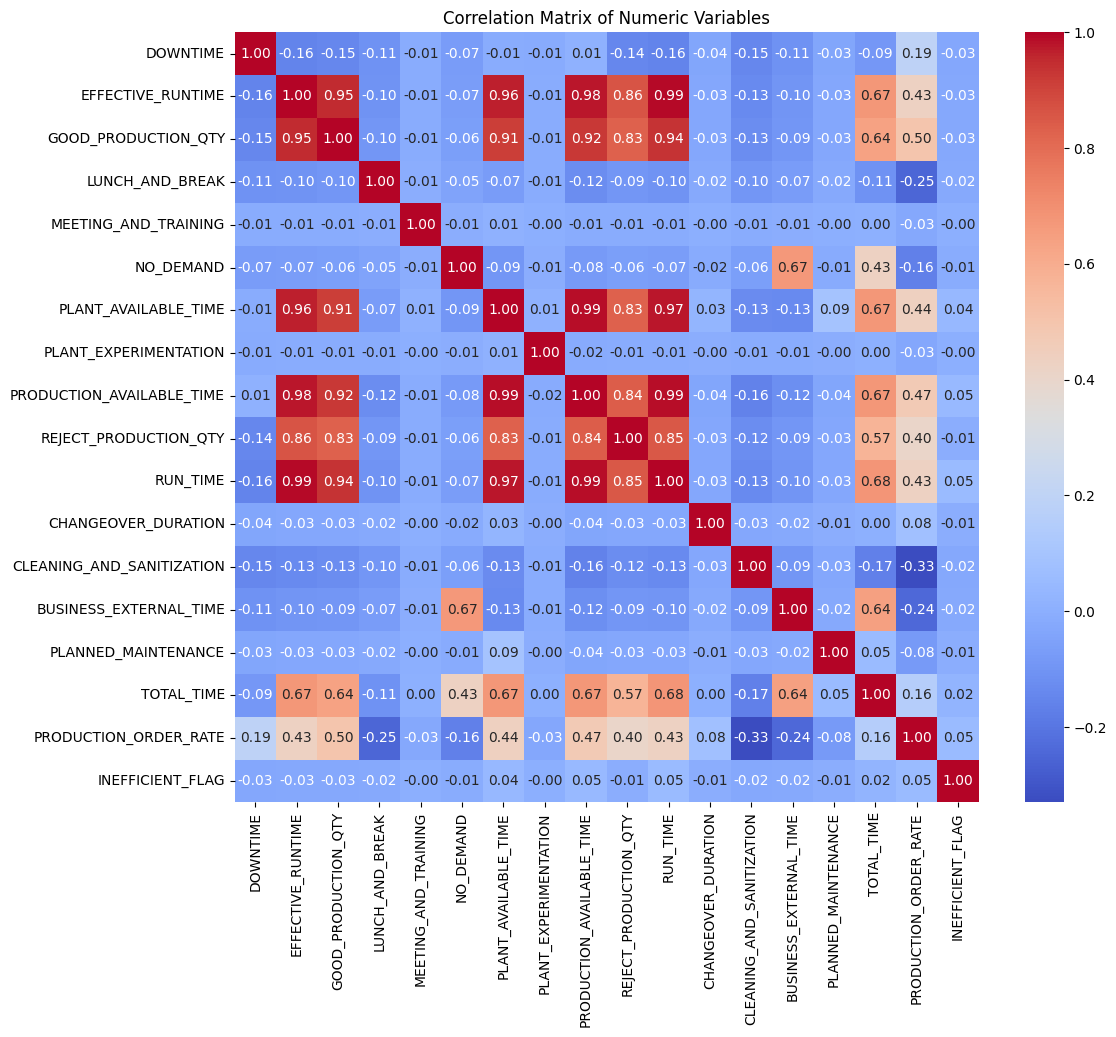

In [ ]:
corr_matrix = production_logs_modified.select_dtypes('number').corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

In [ ]:
running_machines = production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'] == 'Runtime']
not_running = production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'] != 'Runtime']


In [ ]:
print(running_machines.shape)
print(not_running.shape)

(20173, 27)
(128060, 27)


In [ ]:
running_machines.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,20173.0,20173.000000,20173.000000,20173.0,20173.0,20173.0,20173.000000,20173.0,20173.000000,20173.000000,20173.000000,20173.0,20173.0,20173.0,20173.0,20173.000000,20173.000000,20173.000000,20173.000000
mean,0.0,340.728046,22005.138651,0.0,0.0,0.0,344.771725,0.0,344.771725,358.500074,344.771725,0.0,0.0,0.0,0.0,344.771725,91.683979,0.005750,0.030685
std,0.0,104.450900,9927.179026,0.0,0.0,0.0,97.813739,0.0,97.813739,179.009192,97.813739,0.0,0.0,0.0,0.0,97.813739,55.316685,0.075614,0.172466
min,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,20.000000,0.000000,0.000000
25%,0.0,308.000000,13800.000000,0.0,0.0,0.0,307.000000,0.0,307.000000,224.000000,307.000000,0.0,0.0,0.0,0.0,307.000000,60.000000,0.000000,0.000000
50%,0.0,375.000000,24700.000000,0.0,0.0,0.0,378.000000,0.0,378.000000,360.000000,378.000000,0.0,0.0,0.0,0.0,378.000000,78.900000,0.000000,0.000000
75%,0.0,409.465021,30400.000000,0.0,0.0,0.0,413.000000,0.0,413.000000,492.000000,413.000000,0.0,0.0,0.0,0.0,413.000000,133.400000,0.000000,0.000000
max,0.0,695.652174,46100.000000,0.0,0.0,0.0,473.000000,0.0,473.000000,3000.000000,473.000000,0.0,0.0,0.0,0.0,473.000000,344.000000,1.000000,1.000000


So, if the machine is running, DOWNTIME and other indications will not have any specific meaning

In [ ]:
running_machines = running_machines.drop(columns = ['DOWNTIME', 'LUNCH_AND_BREAK', 'MEETING_AND_TRAINING','NO_DEMAND',
                                                    'PLANT_EXPERIMENTATION', 'CHANGEOVER_DURATION','CLEANING_AND_SANITIZATION',
                                                    'BUSINESS_EXTERNAL_TIME', 'PLANNED_MAINTENANCE', 'AE_MODEL_CATEGORY'])

In [ ]:
running_machines.columns

Index(['PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME', 'LINE_NAME', 'CO_TYPE',
       'CREW_ID', 'SIZE_TYPE', 'UTIL_REASON_DESCRIPTION', 'EFFECTIVE_RUNTIME',
       'GOOD_PRODUCTION_QTY', 'PLANT_AVAILABLE_TIME',
       'PRODUCTION_AVAILABLE_TIME', 'REJECT_PRODUCTION_QTY', 'RUN_TIME',
       'TOTAL_TIME', 'PRODUCTION_ORDER_RATE', 'INEFFICIENT_FLAG',
       'NO_PRODUCT'],
      dtype='object')

In [ ]:
# 1. Define the hypothesized composite primary key (PK).
# We are testing if this combination of columns uniquely identifies every row.
candidate_key = [
    'PRODUCTIONDATE_DAY_LOC',
    'SHIFT_NAME',
    'LINE_NAME',
    'CO_TYPE',
    'CREW_ID',
    'SIZE_TYPE'
]

# 2. Check for any duplicate rows based *only* on the candidate_key columns.
# .duplicated(subset=...) returns a boolean Series (True if a row is a duplicate
# of a previous one based on the subset).
# .any() checks if at least one 'True' exists in that Series.
has_duplicates = running_machines.duplicated(subset=candidate_key).any()

# 3. Report the validation result.
if has_duplicates:
    # If True, at least one duplicate combination was found.
    # A primary key *cannot* have duplicates, so this set of columns fails the test.
    print("Validation FAILED: Duplicates found. This set is NOT a unique primary key.")
else:
    # If False, no duplicates were found across the entire DataFrame for this combination.
    # This means it is a valid (unique) primary key candidate.
    print("Validation SUCCESS: No duplicates found. This set is a valid primary key candidate.")

Validation SUCCESS: No duplicates found. This set is a valid primary key candidate.


In [ ]:
running_machines['UTIL_REASON_DESCRIPTION'].value_counts(dropna = False)

,count
UTIL_REASON_DESCRIPTION,
Running,20173


In [ ]:
running_machines = running_machines.drop(columns = 'UTIL_REASON_DESCRIPTION')

In [ ]:
running_machines.head()

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,PLANT_AVAILABLE_TIME,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,TOTAL_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
9,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Renew 360,316.000000,7584,333,333,469,333,333,24.0,0,0
17,2025-01-02,Afternoon-2,MAFT2202,Material_Filament,A,Renew 360,316.000000,7584,332,332,135,332,332,24.0,0,0
22,2025-01-02,Afternoon-2,MAFT2203,Material_Handle,A,Renew 360,224.000000,5376,236,236,349,236,236,24.0,0,0
31,2025-01-02,Afternoon-2,MHPT2301,Material_Handle,A,Deep Action White,400.000000,19200,403,403,499,403,403,48.0,0,0
38,2025-01-02,Afternoon-2,MHPT2302,Material_Handle,A,Deep Action White,429.166667,20300,433,433,545,433,433,96.0,0,0


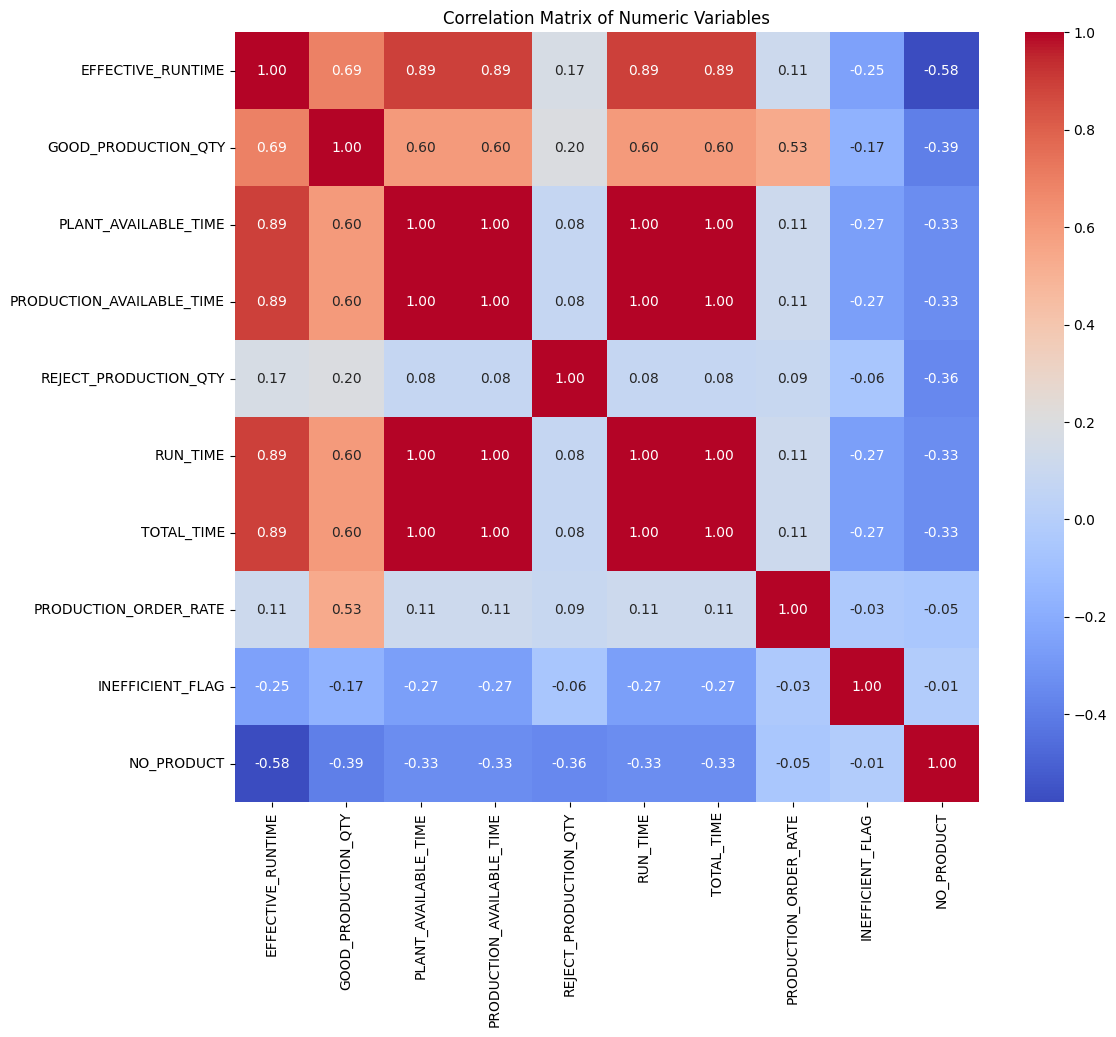

In [ ]:
corr_matrix = running_machines.select_dtypes('number').corr()
# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

RUN_TIME, TOTAL_TIME, PLANT_AVAILABLE_TIME, PRODUCTION_AVAILABLE_TIME seems to be unidentical, which make sense since upon running, machines and plants will use its full potential time.

In [ ]:
running_machines = running_machines.drop(columns=['PLANT_AVAILABLE_TIME',
       'PRODUCTION_AVAILABLE_TIME', 'TOTAL_TIME'])

In [ ]:
running_machines.head()

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG
9,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Renew 360,316.000000,7584,469,333,24.0,0
17,2025-01-02,Afternoon-2,MAFT2202,Material_Filament,A,Renew 360,316.000000,7584,135,332,24.0,0
22,2025-01-02,Afternoon-2,MAFT2203,Material_Handle,A,Renew 360,224.000000,5376,349,236,24.0,0
31,2025-01-02,Afternoon-2,MHPT2301,Material_Handle,A,Deep Action White,400.000000,19200,499,403,48.0,0
38,2025-01-02,Afternoon-2,MHPT2302,Material_Handle,A,Deep Action White,429.166667,20300,545,433,96.0,0


# Categorical EDA on running machines (INSIGHTS GAINED)

In [ ]:
categorical_cols = ['SHIFT_NAME', 'CO_TYPE',
       'CREW_ID', 'SIZE_TYPE']


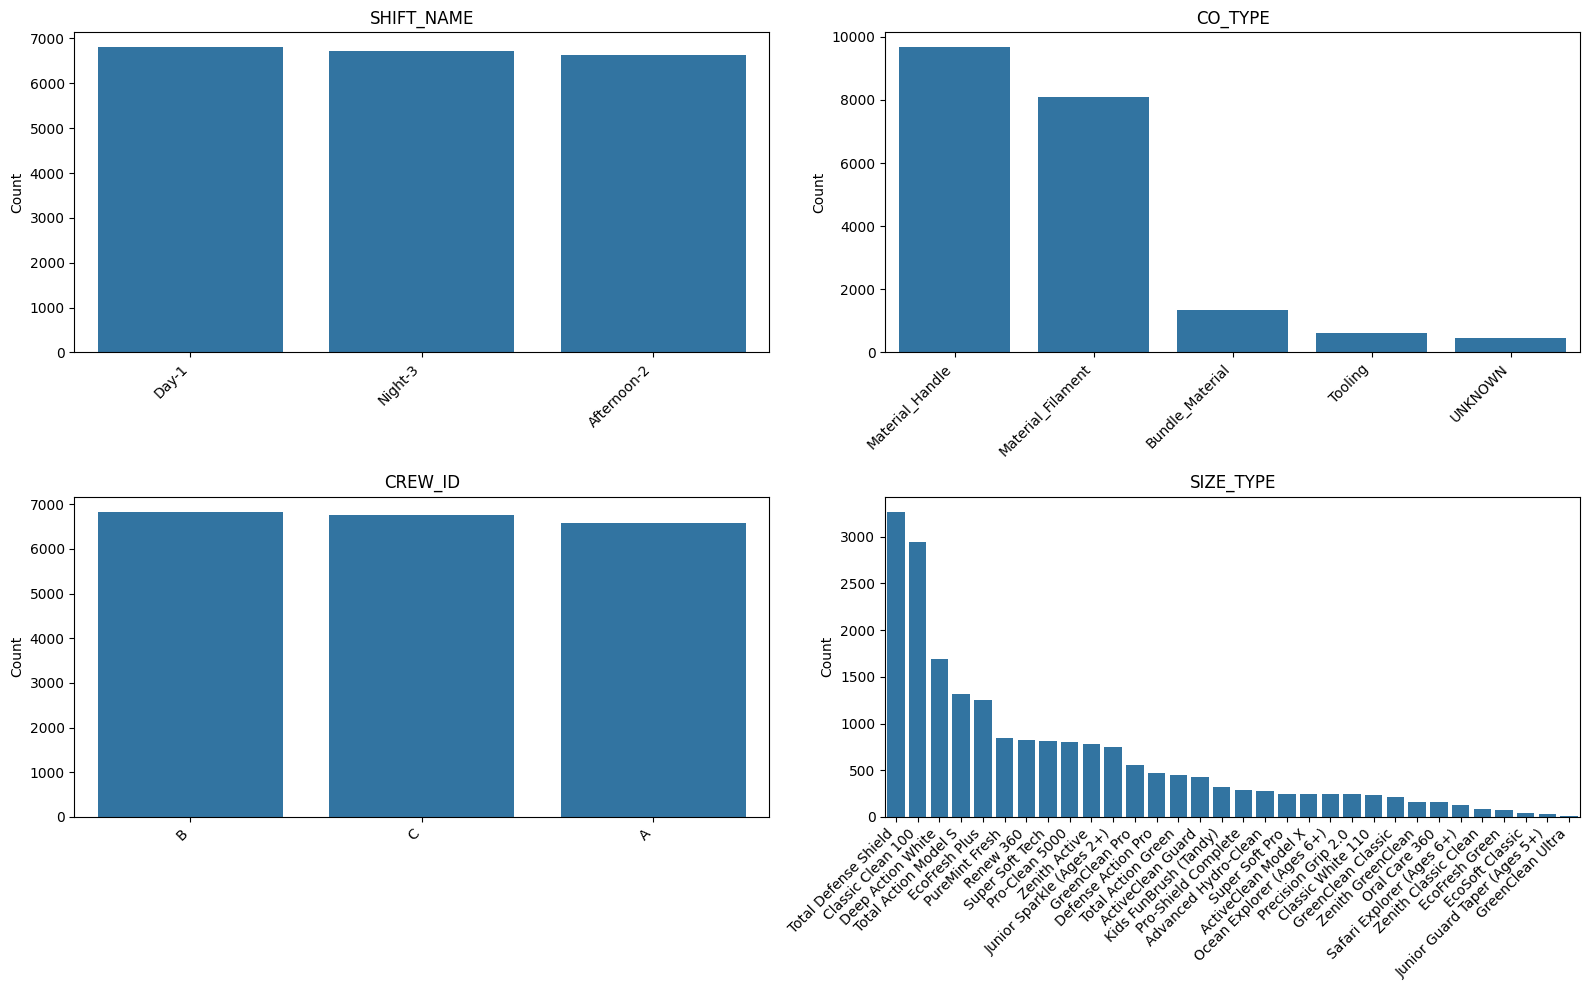

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=running_machines, x=col, order=running_machines[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Uniform distribution of workload between crew teams and shifts -> Comparison between each team's (or each shift's) performance is more reasonable
- Some specific type of products are main strength, contribute largely into the amount of work -> Focus on these products



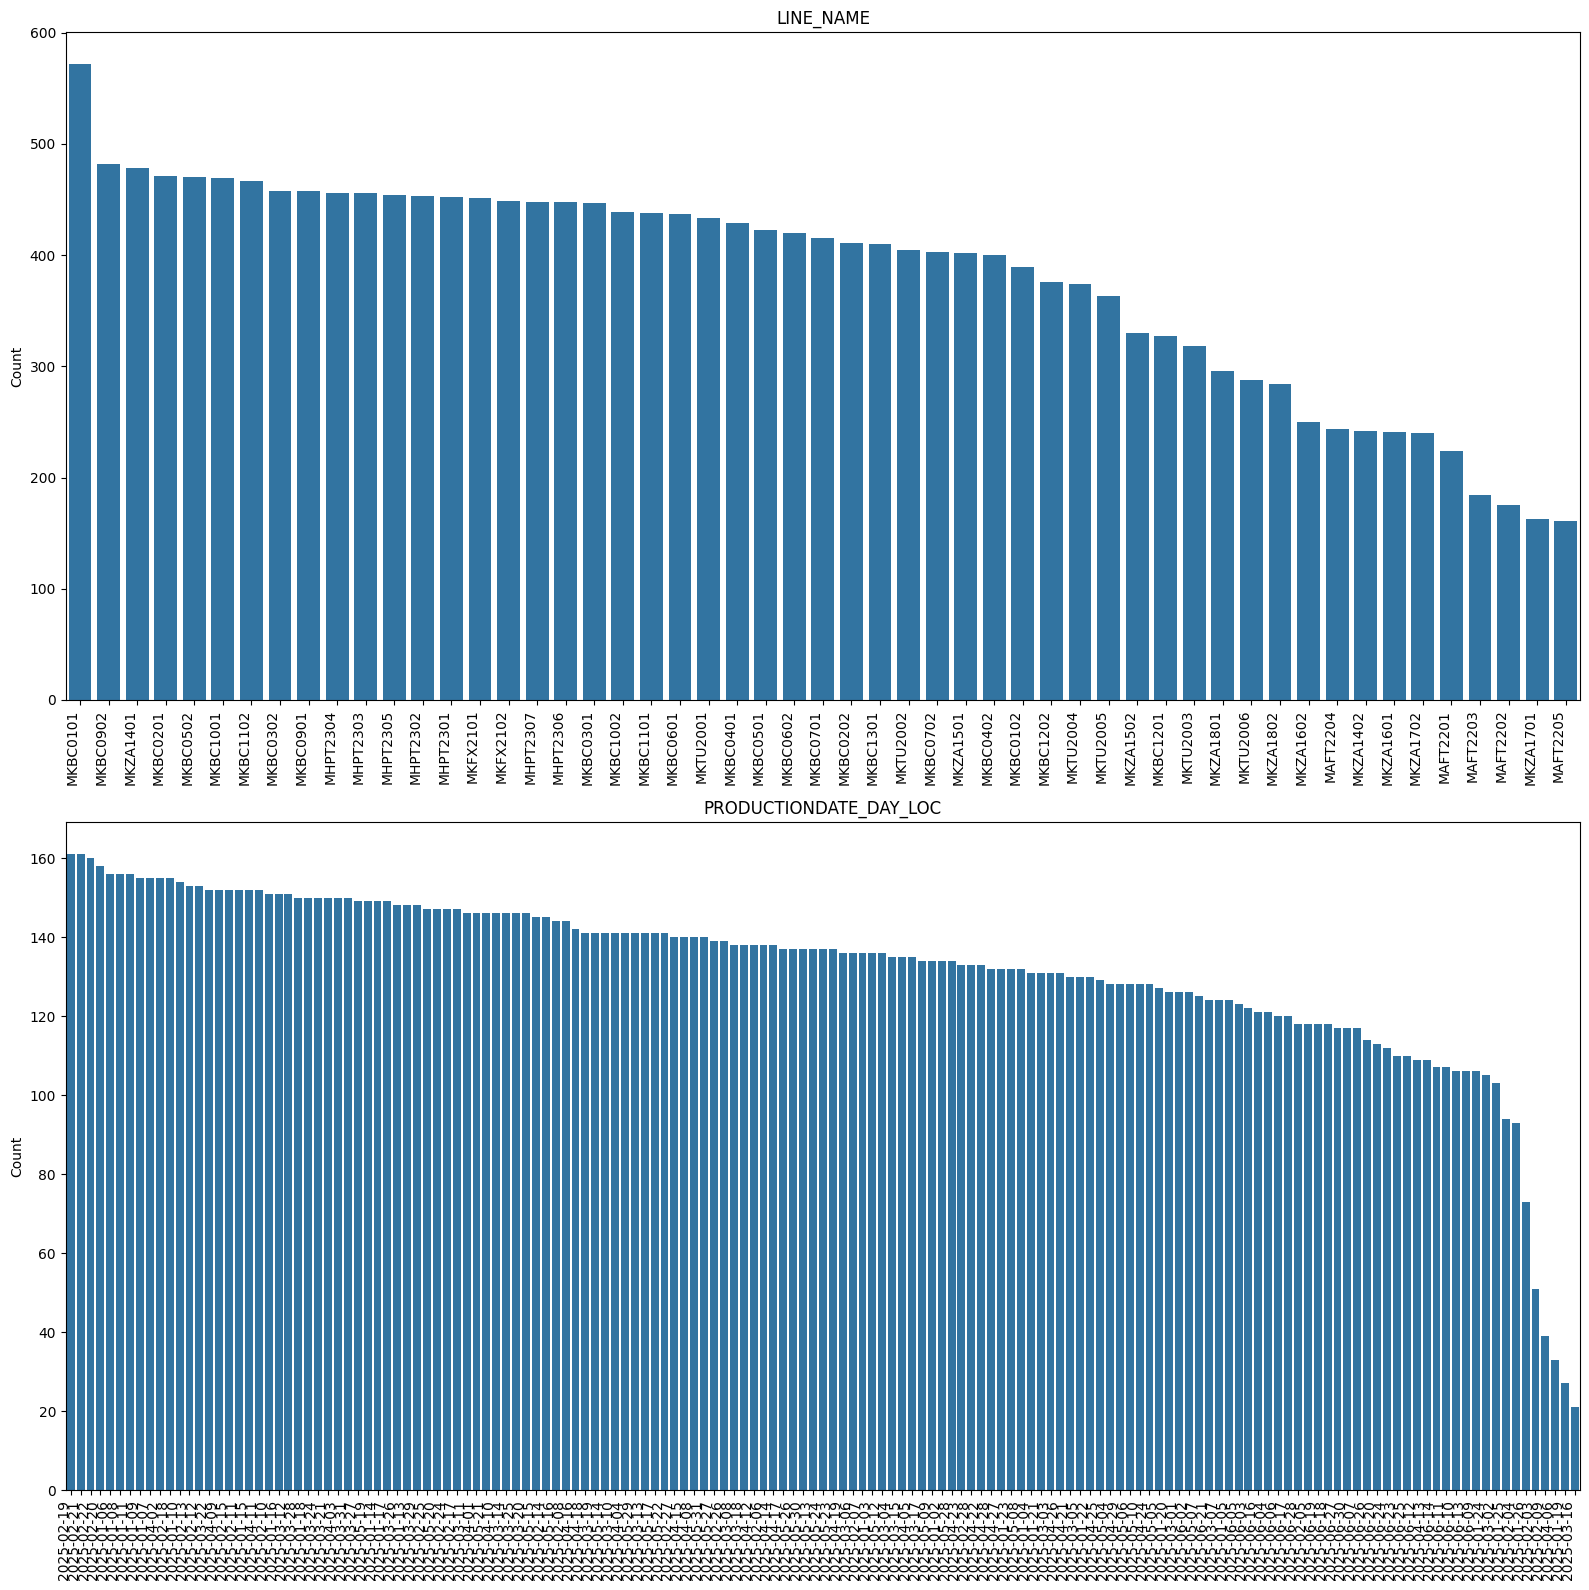

In [ ]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(['LINE_NAME','PRODUCTIONDATE_DAY_LOC'], 1):
    plt.subplot(2, 1, i)
    sns.countplot(data=running_machines, x=col, order=running_machines[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Some line is more packed than others -> Focusing on these lines since errors in them can cause larger damage
- Some days have lighter workload than others, but cannot be sure if this is a normal state or due to other reasons

In [ ]:
days = running_machines.groupby('PRODUCTIONDATE_DAY_LOC').count().sort_values(by='LINE_NAME').head(5).index

In [ ]:
days

Index(['2025-03-16', '2025-01-19', '2025-04-06', '2025-02-09', '2025-02-03'], dtype='object', name='PRODUCTIONDATE_DAY_LOC')

In [ ]:
production_logs_modified.loc[production_logs_modified['PRODUCTIONDATE_DAY_LOC'].isin(days),['UTIL_REASON_DESCRIPTION']].value_counts()

,count
UTIL_REASON_DESCRIPTION,
Weekend,555
Planned Maintenance,191
Running,171
Cleaning and Sanitation,166
Lunch/Break,84
...,...
20-FM - 2009 - Adjust the position of the logo,1
20-FM - 2001-Mechanical adjustment.,1
Bundle_Material,1


So the short on records of these days can be due to the weekend, cannot say that those values are actual anomalies

In [ ]:
low_record_days = running_machines[running_machines['PRODUCTIONDATE_DAY_LOC'].isin(days)]

,0
EFFECTIVE_RUNTIME,"Axes(0.125,0.653529;0.227941x0.226471)"
GOOD_PRODUCTION_QTY,"Axes(0.398529,0.653529;0.227941x0.226471)"
REJECT_PRODUCTION_QTY,"Axes(0.672059,0.653529;0.227941x0.226471)"
RUN_TIME,"Axes(0.125,0.381765;0.227941x0.226471)"
PRODUCTION_ORDER_RATE,"Axes(0.398529,0.381765;0.227941x0.226471)"
INEFFICIENT_FLAG,"Axes(0.672059,0.381765;0.227941x0.226471)"
NO_PRODUCT,"Axes(0.125,0.11;0.227941x0.226471)"


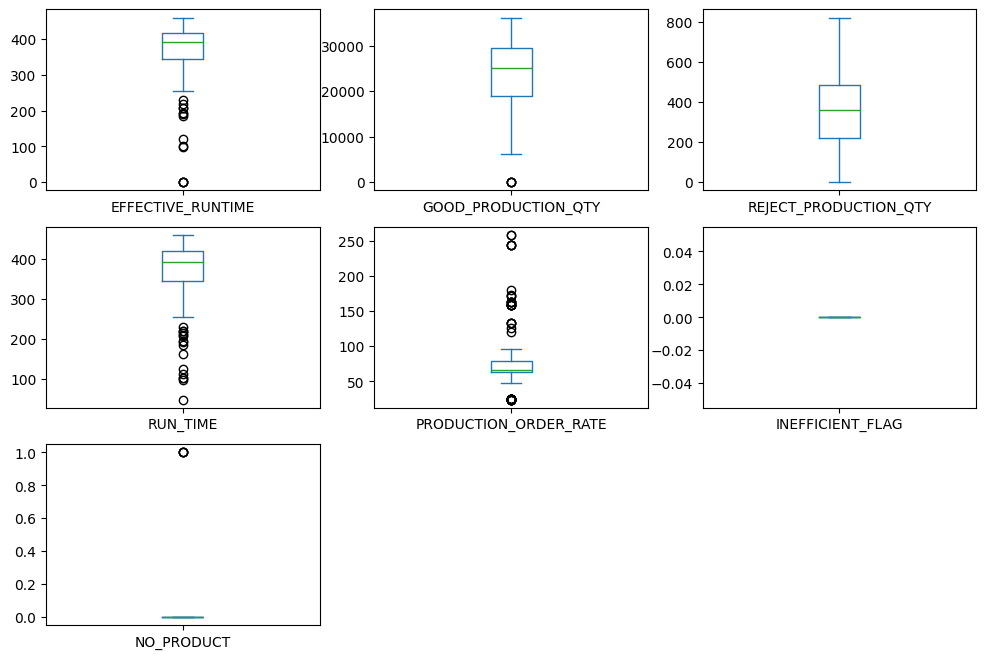

In [ ]:
low_record_days.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8), sharex=False)


In [ ]:
low_record_days.describe()

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.0,171.000000
mean,362.892246,22797.959064,353.532164,365.280702,79.743860,0.0,0.023392
std,88.964355,8647.365106,171.856482,81.766688,48.463119,0.0,0.151588
min,0.000000,0.000000,0.000000,48.000000,24.000000,0.0,0.000000
25%,343.990172,18850.000000,222.000000,344.500000,63.160000,0.0,0.000000
50%,390.943635,25100.000000,359.000000,393.000000,66.700000,0.0,0.000000
75%,417.389698,29387.000000,487.500000,420.000000,78.900000,0.0,0.000000
max,459.658011,36150.000000,822.000000,461.000000,258.000000,0.0,1.000000


In [ ]:
running_machines[low_record_days.select_dtypes('number').columns].describe()

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000
mean,340.728046,22005.138651,358.500074,344.771725,91.683979,0.005750,0.030685
std,104.450900,9927.179026,179.009192,97.813739,55.316685,0.075614,0.172466
min,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000
25%,308.000000,13800.000000,224.000000,307.000000,60.000000,0.000000,0.000000
50%,375.000000,24700.000000,360.000000,378.000000,78.900000,0.000000,0.000000
75%,409.465021,30400.000000,492.000000,413.000000,133.400000,0.000000,0.000000
max,695.652174,46100.000000,3000.000000,473.000000,344.000000,1.000000,1.000000


In [ ]:
production_logs_modified.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000,148233.000000
mean,8.579790,46.369613,2994.675018,2.049004,0.086195,14.304649,62.146513,0.119339,55.499707,48.788205,46.919917,0.776042,2.053409,30.529207,1.344734,92.675720,42.061809,0.000783,0.004176
std,20.815004,123.020541,8386.982087,7.620981,3.048650,80.876225,120.872800,3.556646,122.087658,139.538893,123.601228,9.072468,5.798821,116.566749,16.074489,156.216029,45.151589,0.027963,0.064486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,0.000000,0.000000
75%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,78.900000,0.000000,0.000000
max,480.000000,695.652174,46100.000000,60.000000,360.000000,480.000000,480.000000,480.000000,480.000000,3000.000000,473.000000,650.000000,60.000000,480.000000,480.000000,480.000000,344.000000,1.000000,1.000000


# Distribution EDA

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

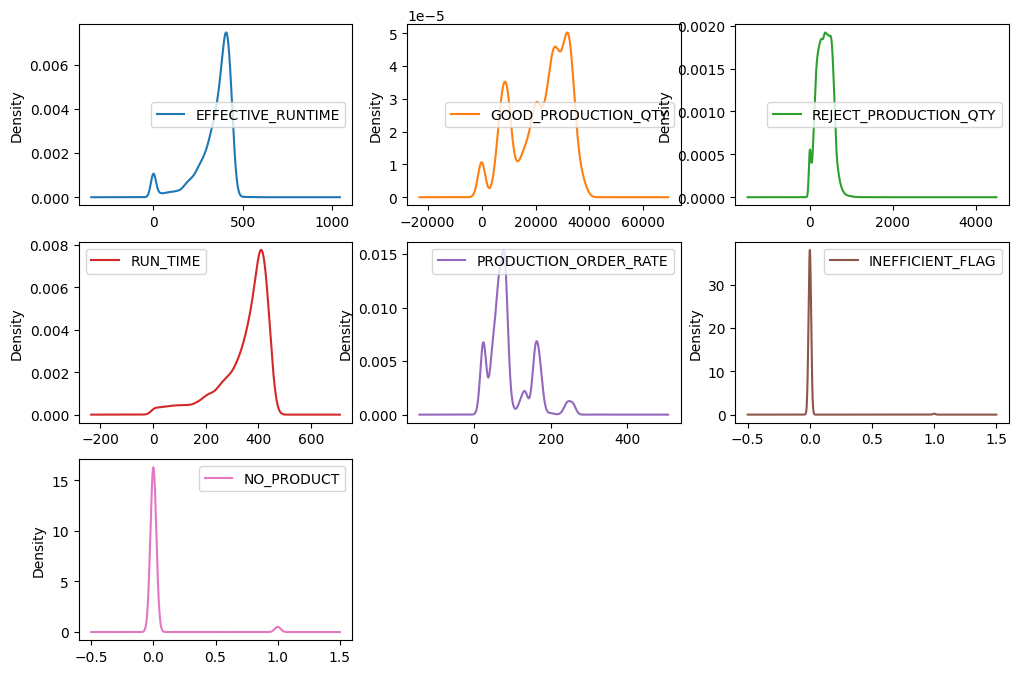

In [ ]:
running_machines.select_dtypes(include='number').plot(kind='density', subplots=True, layout=(3,3), figsize=(12, 8), sharex=False)


,0
EFFECTIVE_RUNTIME,"Axes(0.125,0.653529;0.227941x0.226471)"
GOOD_PRODUCTION_QTY,"Axes(0.398529,0.653529;0.227941x0.226471)"
REJECT_PRODUCTION_QTY,"Axes(0.672059,0.653529;0.227941x0.226471)"
RUN_TIME,"Axes(0.125,0.381765;0.227941x0.226471)"
PRODUCTION_ORDER_RATE,"Axes(0.398529,0.381765;0.227941x0.226471)"
INEFFICIENT_FLAG,"Axes(0.672059,0.381765;0.227941x0.226471)"
NO_PRODUCT,"Axes(0.125,0.11;0.227941x0.226471)"


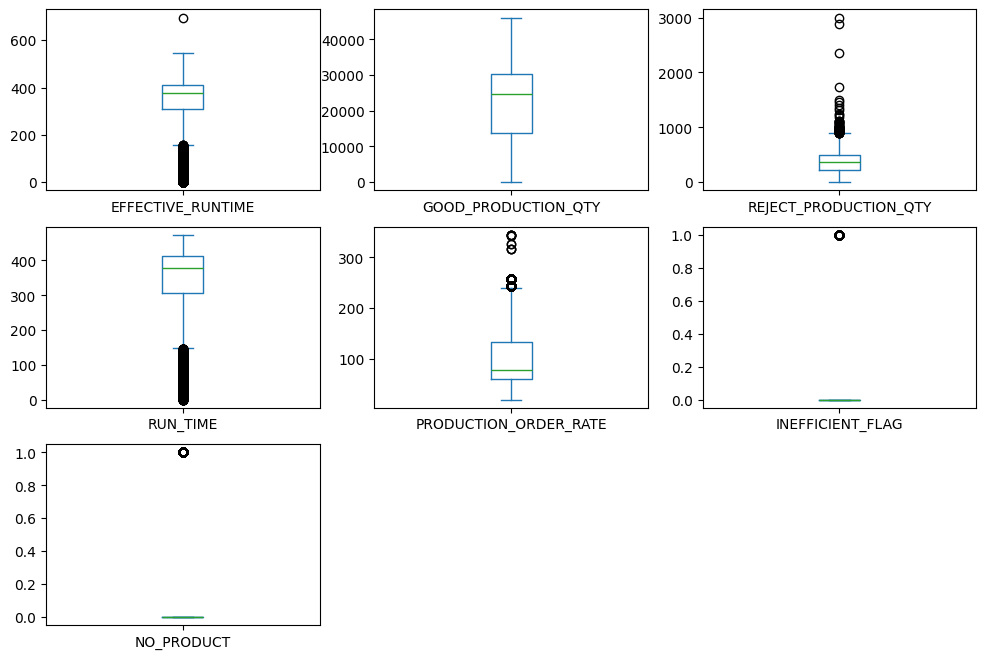

In [ ]:
running_machines.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8), sharex=False)


There are outliers in some numeric columns showing inefficiency in manufacturing, for example low effective runtime, high rejection, ...

## Outliers

In [ ]:
cols = ['RUN_TIME', 'EFFECTIVE_RUNTIME', 'PRODUCTION_ORDER_RATE']

for col in cols:
    Q1 = running_machines[col].quantile(0.25)
    Q3 = running_machines[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = running_machines[(running_machines[col] < lower) | (running_machines[col] > upper)][col]
    print(f"\n📊 {col}")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(running_machines)*100:.2f}%)")



📊 RUN_TIME
  Q1 = 307.00, Q3 = 413.00, IQR = 106.00
  Lower: 148.00, upper: 572.00
  Outliers: 1267 (6.28%)

📊 EFFECTIVE_RUNTIME
  Q1 = 308.00, Q3 = 409.47, IQR = 101.47
  Lower: 155.80, upper: 561.66
  Outliers: 1398 (6.93%)

📊 PRODUCTION_ORDER_RATE
  Q1 = 60.00, Q3 = 133.40, IQR = 73.40
  Lower: -50.10, upper: 243.50
  Outliers: 698 (3.46%)


There seems to be no actual problem in PRODUCTION_RATE.

In [ ]:
running_machines['DEFECTION_RATE'] = running_machines['REJECT_PRODUCTION_QTY']/(running_machines['GOOD_PRODUCTION_QTY'] + running_machines['REJECT_PRODUCTION_QTY'])

In [ ]:
running_machines.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,0
CREW_ID,0
SIZE_TYPE,0
EFFECTIVE_RUNTIME,0
GOOD_PRODUCTION_QTY,0
REJECT_PRODUCTION_QTY,0
RUN_TIME,0


In [ ]:
running_machines.loc[running_machines['DEFECTION_RATE'].isna(), ['REJECT_PRODUCTION_QTY','GOOD_PRODUCTION_QTY']].describe()

,REJECT_PRODUCTION_QTY,GOOD_PRODUCTION_QTY
count,619.0,619.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


Null values appear in DEFECTION_RATE due to no production (NO_PRODUCT = 1), but this issue will be handled later.

In [ ]:
running_machines['DEFECTION_RATE'].describe()

,DEFECTION_RATE
count,19554.000000
mean,0.025932
std,0.076886
min,0.000321
25%,0.010126
50%,0.015806
75%,0.024447
max,1.000000


In [ ]:
Q1 = running_machines['DEFECTION_RATE'].quantile(0.25)
Q3 = running_machines['DEFECTION_RATE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = running_machines[(running_machines['DEFECTION_RATE'] < lower) | (running_machines['DEFECTION_RATE'] > upper)]
print(f"\n📊 {'DEFECTION_RATE'}")
print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")

outliers


📊 DEFECTION_RATE
  Q1 = 0.01, Q3 = 0.02, IQR = 0.01
  Lower: -0.01, upper: 0.05


,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
9,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Renew 360,316.000000,7584,469,333,24.00,0,0,0.058239
22,2025-01-02,Afternoon-2,MAFT2203,Material_Handle,A,Renew 360,224.000000,5376,349,236,24.00,0,0,0.060961
238,2025-01-02,Afternoon-2,MKBC1301,Material_Handle,A,Advanced Hydro-Clean,332.000000,8300,423,342,25.00,0,0,0.048492
275,2025-01-02,Afternoon-2,MKTU2004,Material_Handle,A,GreenClean Pro,395.061728,9600,475,398,24.30,0,0,0.047146
329,2025-01-02,Day-1,MAFT2201,Material_Handle,C,Renew 360,272.000000,6528,677,296,24.00,0,0,0.093963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147789,2025-06-30,Day-1,MKBC0501,Material_Filament,A,Pro-Clean 5000,0.000000,0,200,2,81.40,1,0,1.000000
147897,2025-06-30,Day-1,MKTU2003,Tooling,A,EcoFresh Green,35.003685,4250,301,36,27.14,0,0,0.066139
147916,2025-06-30,Day-1,MKZA1402,Material_Handle,A,ActiveClean Model X,21.943574,4700,389,22,63.80,0,0,0.076439
148185,2025-06-30,Night-3,MKTU2005,Bundle_Material,C,GreenClean Ultra,370.522849,9000,436,392,24.29,0,0,0.046206


In [ ]:
running_machines[(running_machines['DEFECTION_RATE'] < lower)]

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,DEFECTION_RATE


So all outliers are outliers larger in value than upper quartile

In [ ]:
outliers.loc[outliers['DEFECTION_RATE'] == 1, 'GOOD_PRODUCTION_QTY'].value_counts()

,count
GOOD_PRODUCTION_QTY,
0,116


So with DEFECTION_RATE = 1, record should be marked as anomalies

In [ ]:
outliers.loc[outliers['DEFECTION_RATE'] == 1, 'INEFFICIENT_FLAG'].value_counts()

,count
INEFFICIENT_FLAG,
1,116


# Considering records with 100% defection rate (INSIGHTS GAINED)

In [ ]:
anomalies = outliers.loc[outliers['DEFECTION_RATE'] == 1]

In [ ]:
anomalies.describe()

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
count,116.0,116.0,116.000000,116.000000,116.000000,116.0,116.0,116.0
mean,0.0,0.0,223.620690,3.327586,67.923276,1.0,0.0,1.0
std,0.0,0.0,357.365716,4.577404,17.707679,0.0,0.0,0.0
min,0.0,0.0,20.000000,1.000000,20.000000,1.0,0.0,1.0
25%,0.0,0.0,130.000000,2.000000,63.160000,1.0,0.0,1.0
50%,0.0,0.0,190.000000,2.000000,73.005000,1.0,0.0,1.0
75%,0.0,0.0,200.000000,3.000000,79.012500,1.0,0.0,1.0
max,0.0,0.0,3000.000000,38.000000,86.000000,1.0,0.0,1.0


Therefore, in anomalies, we only consider records where products were made but all were rejected (DEFECTION_RATE = 1). Consequently, INEFFICIENT_FLAG and NO_PRODUCT can be disregarded.

In [ ]:
anomalies = anomalies.drop(columns = ['INEFFICIENT_FLAG', 'DEFECTION_RATE','EFFECTIVE_RUNTIME','GOOD_PRODUCTION_QTY','NO_PRODUCT'])

In [ ]:
anomalies.head()

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
529,2025-01-02,Day-1,MKBC1101,Bundle_Material,C,Total Defense Shield,420,5,78.90
2335,2025-01-04,Day-1,MKBC0502,Material_Handle,C,Super Soft Tech,250,3,78.95
4201,2025-01-06,Day-1,MKBC1002,Material_Filament,C,Classic Clean 100,200,3,78.90
5084,2025-01-07,Day-1,MHPT2303,Material_Handle,C,Total Action Model S,130,2,66.70
7289,2025-01-09,Day-1,MHPT2305,Material_Filament,C,Classic Clean 100,230,4,63.20


In [ ]:
anomalies.columns

Index(['PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME', 'LINE_NAME', 'CO_TYPE',
       'CREW_ID', 'SIZE_TYPE', 'REJECT_PRODUCTION_QTY', 'RUN_TIME',
       'PRODUCTION_ORDER_RATE'],
      dtype='object')

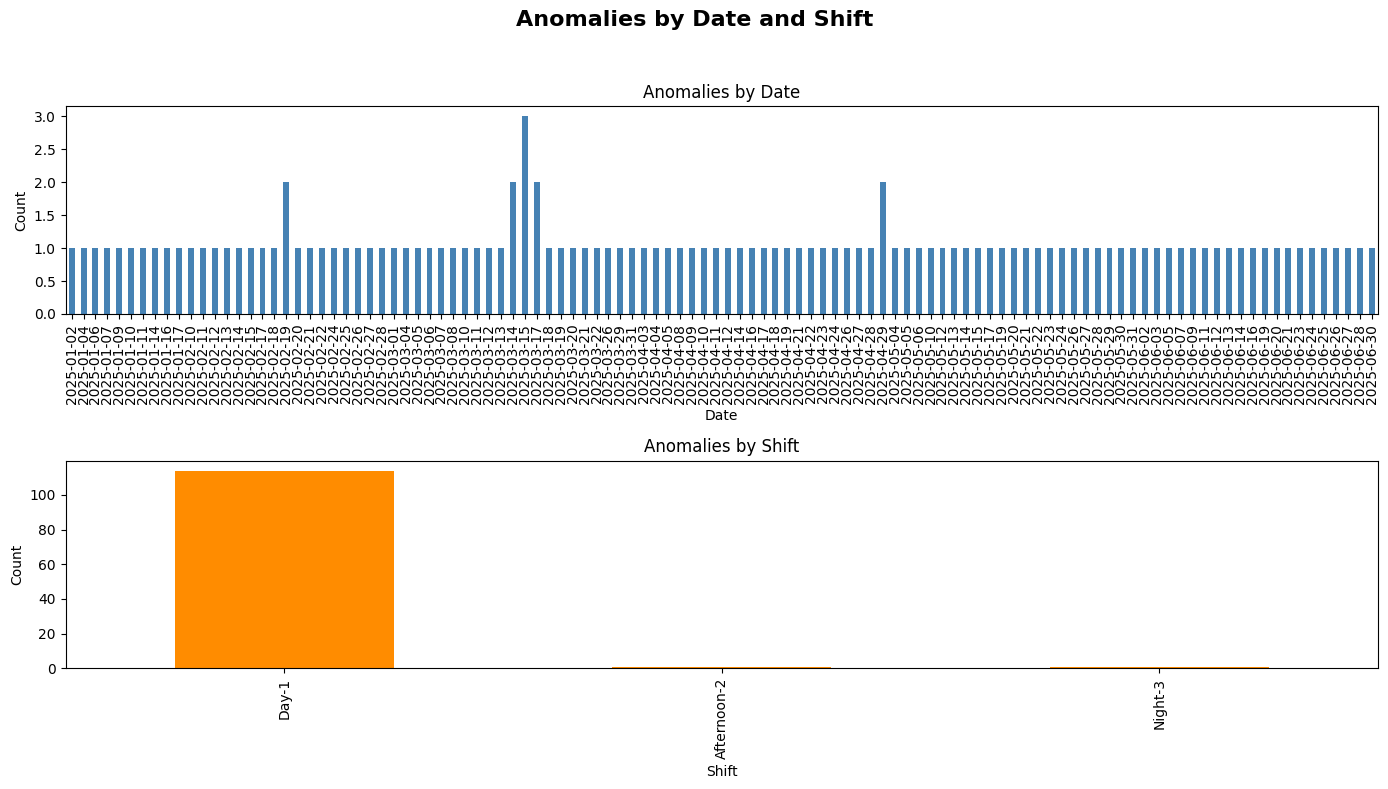

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Anomalies by Date and Shift', fontsize=16, fontweight='bold')

anomalies['PRODUCTIONDATE_DAY_LOC'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='steelblue'
)
axes[0].set_title('Anomalies by Date')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

anomalies['SHIFT_NAME'].value_counts().plot(
    kind='bar', ax=axes[1], color='darkorange'
)
axes[1].set_title('Anomalies by Shift')
axes[1].set_xlabel('Shift')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


There seems not to be anomalies by date, but all the anomalies appear in Day shift, which seems to be abnormal.

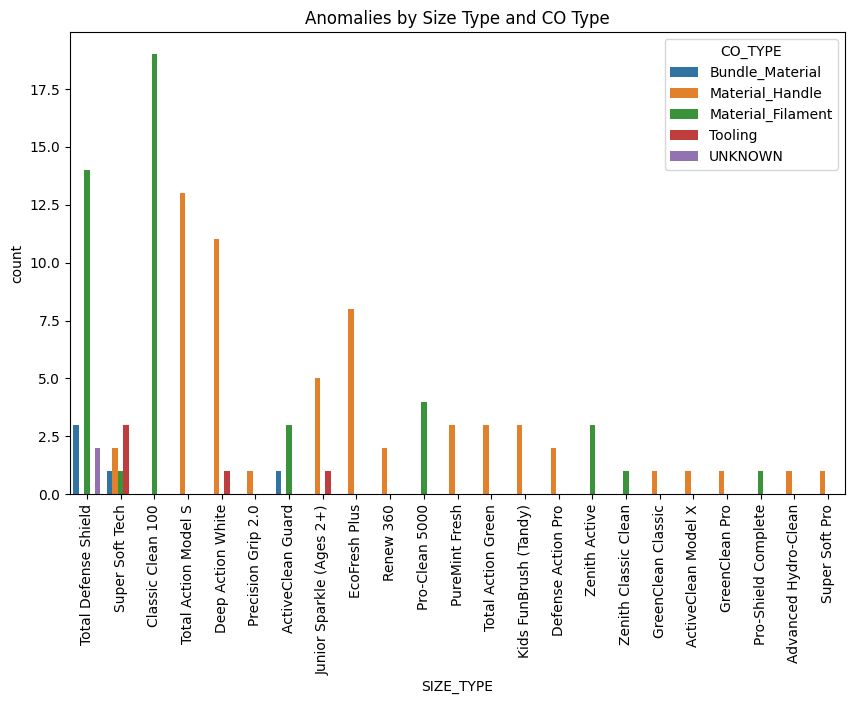

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=anomalies, x='SIZE_TYPE', hue='CO_TYPE')
plt.title('Anomalies by Size Type and CO Type')
plt.xticks(rotation=90)
plt.show()


In [ ]:
running_machines['CO_TYPE'].value_counts(normalize = True)

,proportion
CO_TYPE,
Material_Handle,0.479056
Material_Filament,0.400684
Bundle_Material,0.067020
Tooling,0.031032
UNKNOWN,0.022208


Although among records with 100% defection rate, Material_Handle and Material_Filament appear more frequently than others, it cannot be said that these categories contain actual flaws, since these two categories make up most of CO_TYPE, so it may be because they are overrepresented in the dataset rather than inherently more defective.

In other words, their higher anomaly counts could simply reflect higher production volume or reporting frequency, not necessarily a higher defect rate.

To examine the actual problem, we will need to look into a more specific OEE score

<Axes: title={'center': 'Anomalies Over Time'}, xlabel='PRODUCTIONDATE_DAY_LOC'>

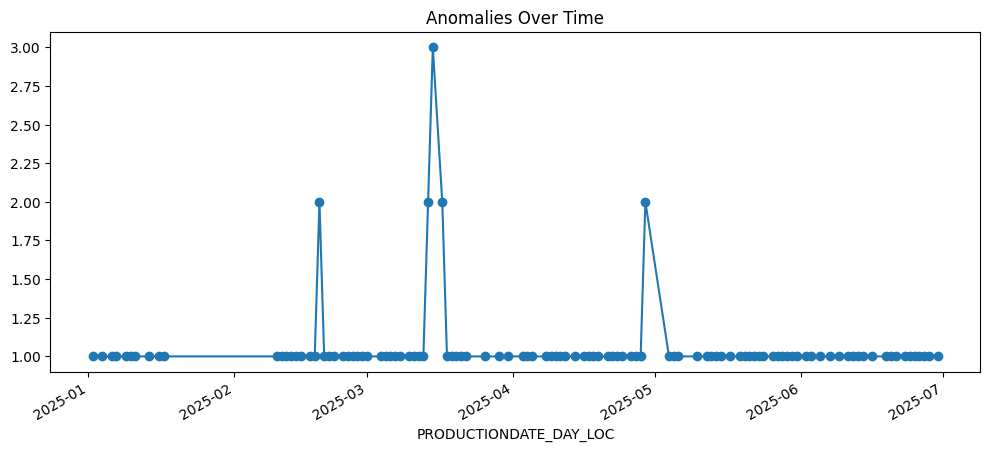

In [ ]:
anomalies['PRODUCTIONDATE_DAY_LOC'] = pd.to_datetime(anomalies['PRODUCTIONDATE_DAY_LOC'])
daily_counts = anomalies.groupby('PRODUCTIONDATE_DAY_LOC').size()

daily_counts.plot(kind='line', marker='o', figsize=(12,5), title='Anomalies Over Time')


<Axes: >

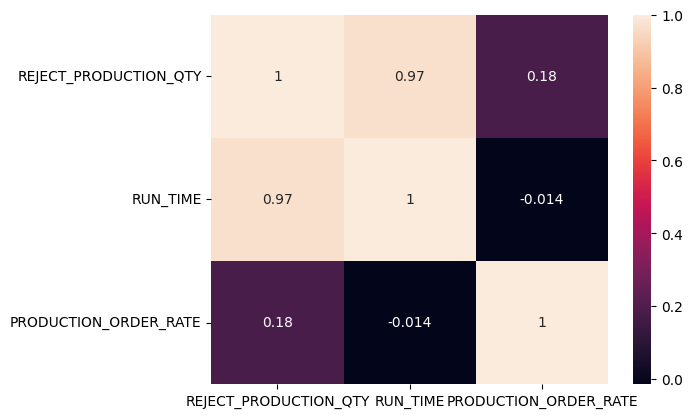

In [ ]:
sns.heatmap(anomalies.select_dtypes('number').corr(), annot=True)


The high correlation between REJECT_PRODUCTION_QTY and RUNTIME may be because the flaw in machines cause the problem that during runtime, all products are rejected, so for every second such flawed machines are running, the more products (which will later be rejected) are created.

In [ ]:
anomalies.select_dtypes('number').describe()

,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
count,116.000000,116.000000,116.000000
mean,223.620690,3.327586,67.923276
std,357.365716,4.577404,17.707679
min,20.000000,1.000000,20.000000
25%,130.000000,2.000000,63.160000
50%,190.000000,2.000000,73.005000
75%,200.000000,3.000000,79.012500
max,3000.000000,38.000000,86.000000


,0
REJECT_PRODUCTION_QTY,"Axes(0.125,0.653529;0.352273x0.226471)"
RUN_TIME,"Axes(0.547727,0.653529;0.352273x0.226471)"
PRODUCTION_ORDER_RATE,"Axes(0.125,0.381765;0.352273x0.226471)"


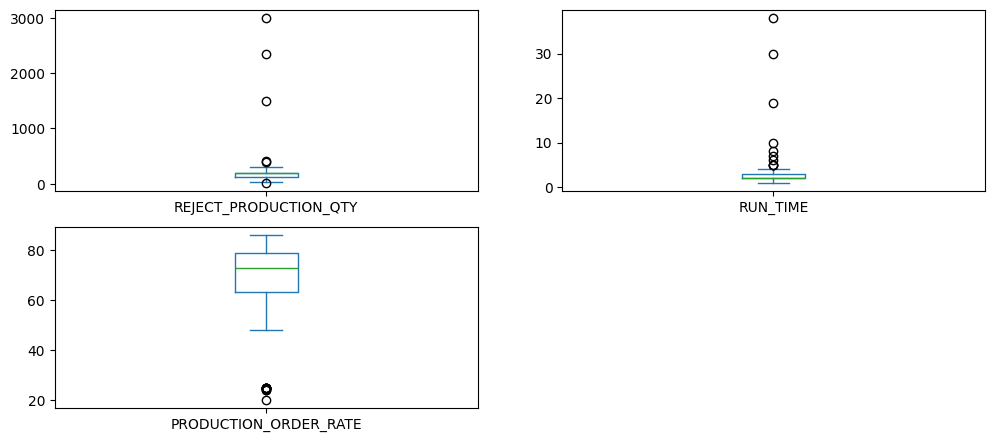

In [ ]:
anomalies.select_dtypes('number').plot(kind='box', subplots=True, layout=(3,2), figsize=(12, 8))

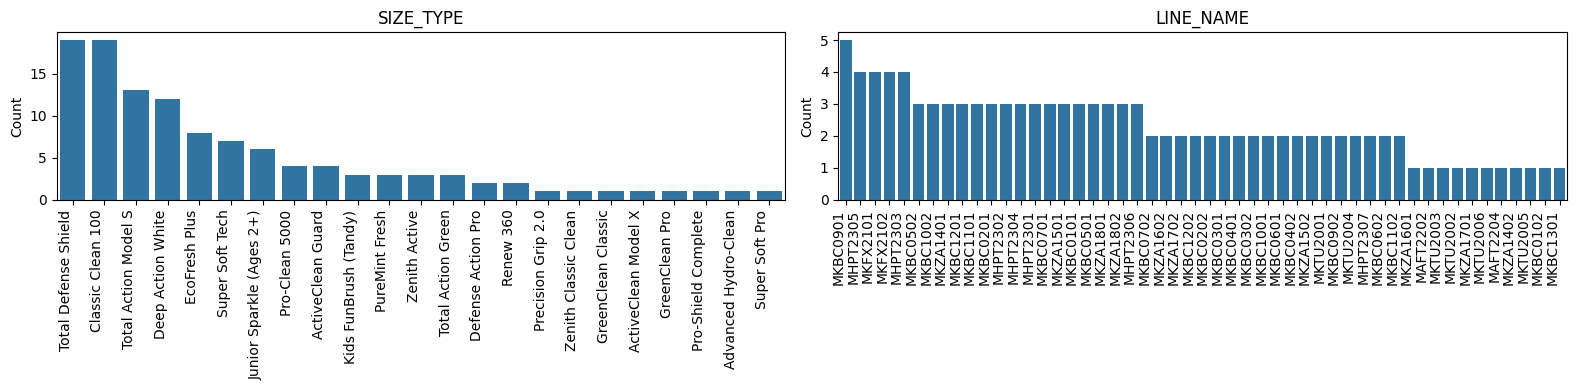

In [ ]:
cat_cols = ['SIZE_TYPE', 'LINE_NAME']

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=anomalies, x=col, order=anomalies[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Navigating outliers (INSIGHTS IN HYP-TEST)

In [ ]:
numeric_cols = anomalies.select_dtypes('number').columns
outlier_mask = pd.Series(False, index=anomalies.index)

for col in numeric_cols:
    Q1 = anomalies[col].quantile(0.25)
    Q3 = anomalies[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (anomalies[col] < lower) | (anomalies[col] > upper)
    outlier_mask |= mask  # gộp lại bằng phép OR

outlier_rows = anomalies[outlier_mask]

print(f"✅ Tổng số dòng có ít nhất 1 outlier: {len(outlier_rows)} ({len(outlier_rows)/len(anomalies)*100:.2f}%)")
display(outlier_rows)


✅ Tổng số dòng có ít nhất 1 outlier: 17 (14.66%)


,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
529,2025-01-02,Day-1,MKBC1101,Bundle_Material,C,Total Defense Shield,420,5,78.90
9640,2025-01-11,Day-1,MKZA1602,Material_Handle,C,Deep Action White,250,5,51.00
32400,2025-02-13,Day-1,MAFT2202,Material_Handle,B,Renew 360,70,3,24.00
38124,2025-02-19,Day-1,MKTU2001,Material_Handle,C,PureMint Fresh,30,1,25.00
38138,2025-02-19,Day-1,MKTU2003,Material_Handle,C,Total Action Green,50,2,25.00
39267,2025-02-20,Day-1,MKTU2006,Material_Handle,C,Total Action Green,50,2,25.00
46471,2025-02-28,Day-1,MKBC1001,Material_Handle,A,Defense Action Pro,400,7,60.00
50872,2025-03-05,Day-1,MKTU2002,Material_Handle,A,PureMint Fresh,100,4,25.00
59429,2025-03-15,Afternoon-2,MKBC0901,Tooling,A,Super Soft Tech,2350,30,78.95
60066,2025-03-15,Night-3,MKBC0901,Tooling,B,Super Soft Tech,1500,19,78.95


In [ ]:
anomalies[anomalies['REJECT_PRODUCTION_QTY'] == round(anomalies['PRODUCTION_ORDER_RATE']*anomalies['RUN_TIME']).astype(int)].shape

(11, 9)

In [ ]:
outlier_rows

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
529,2025-01-02,Day-1,MKBC1101,Bundle_Material,C,Total Defense Shield,420,5,78.90
9640,2025-01-11,Day-1,MKZA1602,Material_Handle,C,Deep Action White,250,5,51.00
32400,2025-02-13,Day-1,MAFT2202,Material_Handle,B,Renew 360,70,3,24.00
38124,2025-02-19,Day-1,MKTU2001,Material_Handle,C,PureMint Fresh,30,1,25.00
38138,2025-02-19,Day-1,MKTU2003,Material_Handle,C,Total Action Green,50,2,25.00
39267,2025-02-20,Day-1,MKTU2006,Material_Handle,C,Total Action Green,50,2,25.00
46471,2025-02-28,Day-1,MKBC1001,Material_Handle,A,Defense Action Pro,400,7,60.00
50872,2025-03-05,Day-1,MKTU2002,Material_Handle,A,PureMint Fresh,100,4,25.00
59429,2025-03-15,Afternoon-2,MKBC0901,Tooling,A,Super Soft Tech,2350,30,78.95
60066,2025-03-15,Night-3,MKBC0901,Tooling,B,Super Soft Tech,1500,19,78.95


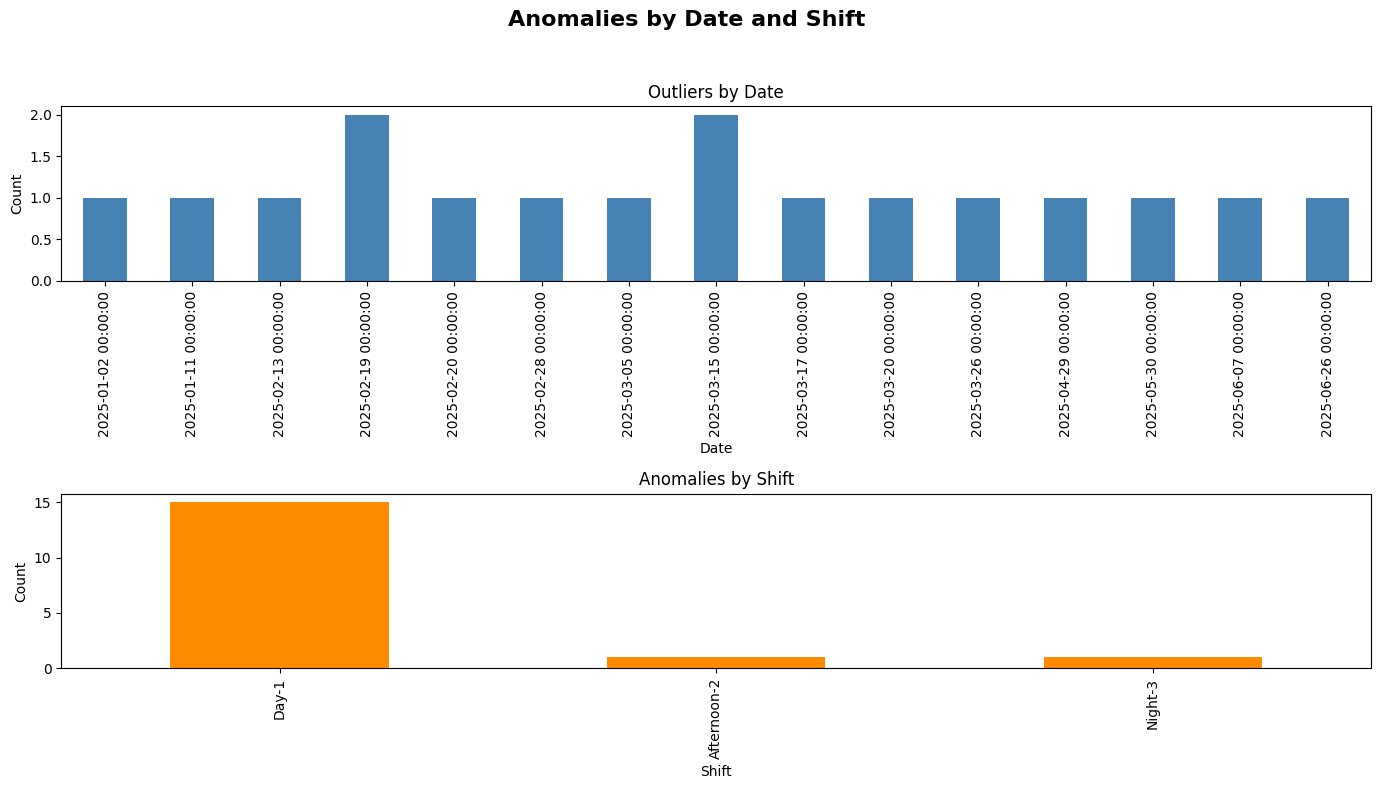

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Anomalies by Date and Shift', fontsize=16, fontweight='bold')

# --- Theo ngày ---
outlier_rows['PRODUCTIONDATE_DAY_LOC'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='steelblue'
)
axes[0].set_title('Outliers by Date')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# --- Theo ca ---
outlier_rows['SHIFT_NAME'].value_counts().plot(
    kind='bar', ax=axes[1], color='darkorange'
)
axes[1].set_title('Anomalies by Shift')
axes[1].set_xlabel('Shift')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


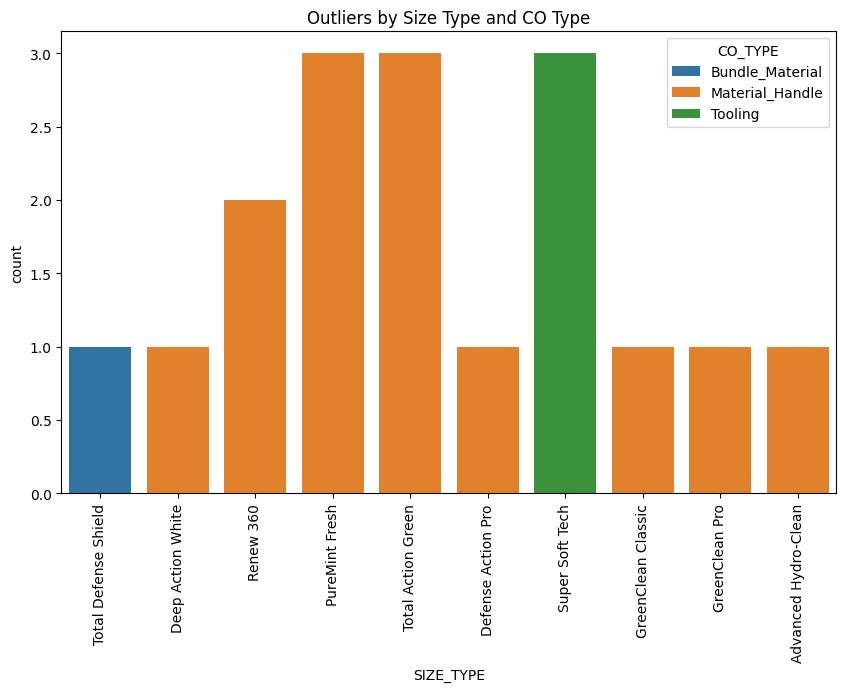

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=outlier_rows, x='SIZE_TYPE', hue='CO_TYPE')
plt.title('Outliers by Size Type and CO Type')
plt.xticks(rotation=90)
plt.show()


In [ ]:
outlier_rows[outlier_rows['REJECT_PRODUCTION_QTY'] >= 100]

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
529,2025-01-02,Day-1,MKBC1101,Bundle_Material,C,Total Defense Shield,420,5,78.90
9640,2025-01-11,Day-1,MKZA1602,Material_Handle,C,Deep Action White,250,5,51.00
46471,2025-02-28,Day-1,MKBC1001,Material_Handle,A,Defense Action Pro,400,7,60.00
50872,2025-03-05,Day-1,MKTU2002,Material_Handle,A,PureMint Fresh,100,4,25.00
59429,2025-03-15,Afternoon-2,MKBC0901,Tooling,A,Super Soft Tech,2350,30,78.95
60066,2025-03-15,Night-3,MKBC0901,Tooling,B,Super Soft Tech,1500,19,78.95
60939,2025-03-17,Day-1,MKBC0901,Tooling,A,Super Soft Tech,3000,38,78.95
64096,2025-03-20,Day-1,MKTU2004,Material_Handle,A,GreenClean Classic,200,10,20.00
69309,2025-03-26,Day-1,MAFT2204,Material_Handle,B,Renew 360,150,6,24.00
125105,2025-05-30,Day-1,MKTU2004,Material_Handle,B,Total Action Green,100,4,25.00


In [ ]:
outlier_rows[outlier_rows['RUN_TIME'] <= 5]

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE
529,2025-01-02,Day-1,MKBC1101,Bundle_Material,C,Total Defense Shield,420,5,78.9
9640,2025-01-11,Day-1,MKZA1602,Material_Handle,C,Deep Action White,250,5,51.0
32400,2025-02-13,Day-1,MAFT2202,Material_Handle,B,Renew 360,70,3,24.0
38124,2025-02-19,Day-1,MKTU2001,Material_Handle,C,PureMint Fresh,30,1,25.0
38138,2025-02-19,Day-1,MKTU2003,Material_Handle,C,Total Action Green,50,2,25.0
39267,2025-02-20,Day-1,MKTU2006,Material_Handle,C,Total Action Green,50,2,25.0
50872,2025-03-05,Day-1,MKTU2002,Material_Handle,A,PureMint Fresh,100,4,25.0
100002,2025-04-29,Day-1,MKTU2005,Material_Handle,C,GreenClean Pro,20,1,24.3
125105,2025-05-30,Day-1,MKTU2004,Material_Handle,B,Total Action Green,100,4,25.0
145265,2025-06-26,Day-1,MKTU2001,Material_Handle,C,PureMint Fresh,120,5,25.0


In [ ]:
running_machines.loc[running_machines['CO_TYPE'] == 'Material_Handle','RUN_TIME'].describe()

,RUN_TIME
count,9664.000000
mean,345.309189
std,92.752935
min,1.000000
25%,305.000000
50%,375.000000
75%,411.250000
max,471.000000


Một số bản ghi có RUN_TIME thấp bất thường đều có CO_TYPE = Material_Handle, trong khi trung bình RUN_TIME của các bản ghi có giá trị này trong số các bản ghi đang vận hành cao hơn rất nhiều. Điều này gợi ý rằng vấn đề có thể không nằm ở loại CO_TYPE, mà do một nguyên nhân khác khiến RUN_TIME thấp bất thường. Phân tích một số nguyên nhân:
- Khả năng dây chuyền gặp sự cố trong giai đoạn Material_Handle → Có thể dây chuyền bắt đầu chạy Material_Handle rồi dừng sớm hoặc lỗi ngay đầu ca
- Lỗi trong ghi nhận dữ liệu
- Các ca ghi nhận dữ liệu RUN_TIME thấp bất thường hầu hết do nhóm C phụ trách, nhưng phân phối các nhóm có DEFECTION_RATE tương đối đồng đều -> Khó có thể nghi ngờ ảnh hưởng của nhóm C, nhưng cần phải lưu ý do nhóm C thường có RUN_TIME thấp, tức là hoặc họ vận hành có vấn đề, hoặc là việc RUN_TIME thấp trong ca làm của họ là ngẫu nhiên -> Kiểm định tính độc lập



In [ ]:
from scipy.stats import kruskal

groups = [group['RUN_TIME'].dropna().values for _, group in running_machines.groupby('CREW_ID')]
h_stat, p_value = kruskal(*groups)

print(f"H-statistic = {h_stat:.4f}")
print(f"p-value = {p_value:.4e}")

if p_value < 0.05:
    print("❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến RUN_TIME.")
else:
    print("✅ Kết luận: Không có bằng chứng cho thấy sự khác biệt đáng kể về RUN_TIME giữa các nhóm CREW_ID.")


H-statistic = 10.4150
p-value = 5.4752e-03
❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến RUN_TIME.


Lưu ý đây chỉ là xét trên các record ghi nhận "Đang vận hành". Tiếp theo đây sẽ tiến hành kiểm định trên toàn bộ datasets

In [ ]:
from scipy.stats import kruskal

groups = [group['RUN_TIME'].dropna().values for _, group in production_logs_modified.groupby('CREW_ID')]
h_stat, p_value = kruskal(*groups)

print(f"H-statistic = {h_stat:.4f}")
print(f"p-value = {p_value:.4e}")

if p_value < 0.05:
    print("❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến RUN_TIME.")
else:
    print("✅ Kết luận: Không có bằng chứng cho thấy sự khác biệt đáng kể về RUN_TIME giữa các nhóm CREW_ID.")


H-statistic = 12.5187
p-value = 1.9125e-03
❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến RUN_TIME.


In [ ]:
from scipy.stats import kruskal

groups = [group['EFFECTIVE_RUNTIME'].dropna().values for _, group in production_logs_modified.groupby('CREW_ID')]
h_stat, p_value = kruskal(*groups)

print(f"H-statistic = {h_stat:.4f}")
print(f"p-value = {p_value:.4e}")

if p_value < 0.05:
    print("❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến EFFECTIVE_RUNTIME.")
else:
    print("✅ Kết luận: Không có bằng chứng cho thấy sự khác biệt đáng kể về EFFECTIVE_RUNTIME giữa các nhóm CREW_ID.")


H-statistic = 13.0904
p-value = 1.4370e-03
❗ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các nhóm CREW_ID → nhóm vận hành ảnh hưởng đáng kể đến EFFECTIVE_RUNTIME.


Trung bình thời gian vận hành theo nhóm:

In [ ]:
running_machines.groupby('CREW_ID')['RUN_TIME'].describe()

,count,mean,std,min,25%,50%,75%,max
CREW_ID,,,,,,,,
A,6574.0,344.017341,96.347680,1.0,309.0,377.0,410.0,471.0
B,6833.0,343.968242,98.762964,1.0,304.0,377.0,413.0,473.0
C,6766.0,346.316140,98.259325,1.0,309.0,381.0,416.0,471.0


Trung bình thời gian vận hành hiệu quả theo nhóm

In [ ]:
running_machines.groupby('CREW_ID')['EFFECTIVE_RUNTIME'].describe()

,count,mean,std,min,25%,50%,75%,max
CREW_ID,,,,,,,,
A,6574.0,340.115745,102.917166,0.0,309.199946,373.291299,408.333333,545.000000
B,6833.0,340.495679,105.072335,0.0,304.477612,375.000000,410.465116,695.652174
C,6766.0,341.557639,105.307336,0.0,308.769041,376.554557,411.861252,542.500000


In [ ]:
running_machines

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
9,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Renew 360,316.000000,7584,469,333,24.00,0,0,0.058239
17,2025-01-02,Afternoon-2,MAFT2202,Material_Filament,A,Renew 360,316.000000,7584,135,332,24.00,0,0,0.017489
22,2025-01-02,Afternoon-2,MAFT2203,Material_Handle,A,Renew 360,224.000000,5376,349,236,24.00,0,0,0.060961
31,2025-01-02,Afternoon-2,MHPT2301,Material_Handle,A,Deep Action White,400.000000,19200,499,403,48.00,0,0,0.025331
38,2025-01-02,Afternoon-2,MHPT2302,Material_Handle,A,Deep Action White,429.166667,20300,545,433,96.00,0,0,0.026145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148199,2025-06-30,Night-3,MKZA1401,Material_Filament,C,ActiveClean Guard,393.283582,26050,399,394,134.00,0,0,0.015086
148209,2025-06-30,Night-3,MKZA1501,Material_Handle,C,Super Soft Pro,406.794814,27000,398,391,67.11,0,0,0.014527
148213,2025-06-30,Night-3,MKZA1501,Material_Filament,C,Super Soft Pro,0.000000,0,0,25,67.11,0,1,NaN
148222,2025-06-30,Night-3,MKZA1502,Material_Handle,C,Super Soft Pro,361.347042,24250,327,370,67.11,0,0,0.013305


In [ ]:
running_machines['DEFECTION_RATE'].sort_values().unique()

array([3.20615582e-04, 7.11203831e-04, 9.34893983e-04, ...,
       1.57049674e-01, 1.00000000e+00,            nan])

In [ ]:
running_machines.to_csv('running_machines.csv', index=False)

##

# ANOMALIES DETECTION

In [ ]:
cols = ['RUN_TIME', 'EFFECTIVE_RUNTIME', 'PRODUCTION_ORDER_RATE']

for col in cols:
    Q1 = running_machines[col].quantile(0.25)
    Q3 = running_machines[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = running_machines[(running_machines[col] < lower) | (running_machines[col] > upper)][col]
    print(f"\n📊 {col}")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(running_machines)*100:.2f}%)")



📊 RUN_TIME
  Q1 = 307.00, Q3 = 413.00, IQR = 106.00
  Lower: 148.00, upper: 572.00
  Outliers: 1267 (6.28%)

📊 EFFECTIVE_RUNTIME
  Q1 = 308.00, Q3 = 409.47, IQR = 101.47
  Lower: 155.80, upper: 561.66
  Outliers: 1398 (6.93%)

📊 PRODUCTION_ORDER_RATE
  Q1 = 60.00, Q3 = 133.40, IQR = 73.40
  Lower: -50.10, upper: 243.50
  Outliers: 698 (3.46%)


In [ ]:
running_machines.describe()

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
count,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000,20173.000000,19554.000000
mean,340.728046,22005.138651,358.500074,344.771725,91.683979,0.005750,0.030685,0.025932
std,104.450900,9927.179026,179.009192,97.813739,55.316685,0.075614,0.172466,0.076886
min,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000321
25%,308.000000,13800.000000,224.000000,307.000000,60.000000,0.000000,0.000000,0.010126
50%,375.000000,24700.000000,360.000000,378.000000,78.900000,0.000000,0.000000,0.015806
75%,409.465021,30400.000000,492.000000,413.000000,133.400000,0.000000,0.000000,0.024447
max,695.652174,46100.000000,3000.000000,473.000000,344.000000,1.000000,1.000000,1.000000


In [ ]:
running_machines.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,0
CREW_ID,0
SIZE_TYPE,0
EFFECTIVE_RUNTIME,0
GOOD_PRODUCTION_QTY,0
REJECT_PRODUCTION_QTY,0
RUN_TIME,0


In [ ]:
running_machines[running_machines['DEFECTION_RATE'].isna()]

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
11,2025-01-02,Afternoon-2,MKBC0101,Bundle_Material,A,Kids FunBrush (Tandy),0.0,0,0,15,86.00,0,1,NaN
22,2025-01-02,Afternoon-2,MKBC0502,Material_Handle,A,Super Soft Tech,0.0,0,0,133,157.90,0,1,NaN
40,2025-01-02,Afternoon-2,MKTU2005,Tooling,A,EcoFresh Green,0.0,0,0,85,27.14,0,1,NaN
43,2025-01-02,Afternoon-2,MKZA1401,Bundle_Material,A,Super Soft Tech,0.0,0,0,100,67.00,0,1,NaN
48,2025-01-02,Day-1,MAFT2202,Material_Filament,C,Renew 360,0.0,0,0,101,24.00,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20027,2025-06-28,Night-3,MKBC0101,Material_Handle,B,Safari Explorer (Ages 6+),0.0,0,0,264,258.00,0,1,NaN
20066,2025-06-30,Afternoon-2,MKBC0201,Material_Filament,B,EcoFresh Plus,0.0,0,0,217,85.70,0,1,NaN
20103,2025-06-30,Day-1,MKBC0101,Bundle_Material,A,Ocean Explorer (Ages 6+),0.0,0,0,286,86.00,0,1,NaN
20143,2025-06-30,Night-3,MKBC0201,Material_Filament,C,EcoFresh Plus,0.0,0,0,348,171.40,0,1,NaN


In [ ]:
running_machines[running_machines['DEFECTION_RATE'].isna()].describe()

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT,DEFECTION_RATE
count,619.0,619.0,619.0,619.000000,619.000000,619.0,619.0,0.0
mean,0.0,0.0,0.0,161.032310,75.724572,0.0,1.0,NaN
std,0.0,0.0,0.0,97.987577,34.757186,0.0,0.0,NaN
min,0.0,0.0,0.0,1.000000,20.000000,0.0,1.0,NaN
25%,0.0,0.0,0.0,77.500000,67.000000,0.0,1.0,NaN
50%,0.0,0.0,0.0,145.000000,78.950000,0.0,1.0,NaN
75%,0.0,0.0,0.0,237.000000,86.000000,0.0,1.0,NaN
max,0.0,0.0,0.0,413.000000,258.000000,0.0,1.0,NaN


Có vẻ như các dòng có DEFECTION_RATE = N/A là do không có sản phẩm được tạo ra, và cũng không có sản phẩm được chấp thuận/từ chối.

# Các record không có sản phẩm nào được tạo ra

In [ ]:
no_prod = running_machines[running_machines['DEFECTION_RATE'].isna()]

In [ ]:
no_prod['RUN_TIME'].value_counts().index.sort_values()

Index([  1,   2,   7,  10,  12,  14,  15,  16,  18,  19,
       ...
       362, 365, 373, 375, 376, 377, 383, 397, 401, 413],
      dtype='int64', name='RUN_TIME', length=288)

Như vậy trong số các record không có sản phẩm nào được tạo ra, runtime vẫn có giá trị, khả năng cao do vấn đề trong dây chuyền sản xuất khiến cho mặc dù máy vẫn hoạt động, không có sản phẩm nào được tạo ra

In [ ]:
no_prod = no_prod.drop(columns = ['GOOD_PRODUCTION_QTY', 'EFFECTIVE_RUNTIME', 'REJECT_PRODUCTION_QTY','DEFECTION_RATE'])

In [ ]:
no_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 11 to 20170
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC  619 non-null    object 
 1   SHIFT_NAME              619 non-null    object 
 2   LINE_NAME               619 non-null    object 
 3   CO_TYPE                 619 non-null    object 
 4   CREW_ID                 619 non-null    object 
 5   SIZE_TYPE               619 non-null    object 
 6   RUN_TIME                619 non-null    int64  
 7   PRODUCTION_ORDER_RATE   619 non-null    float64
 8   INEFFICIENT_FLAG        619 non-null    int64  
 9   NO_PRODUCT              619 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 53.2+ KB


In [ ]:
no_prod.duplicated().sum()

np.int64(0)

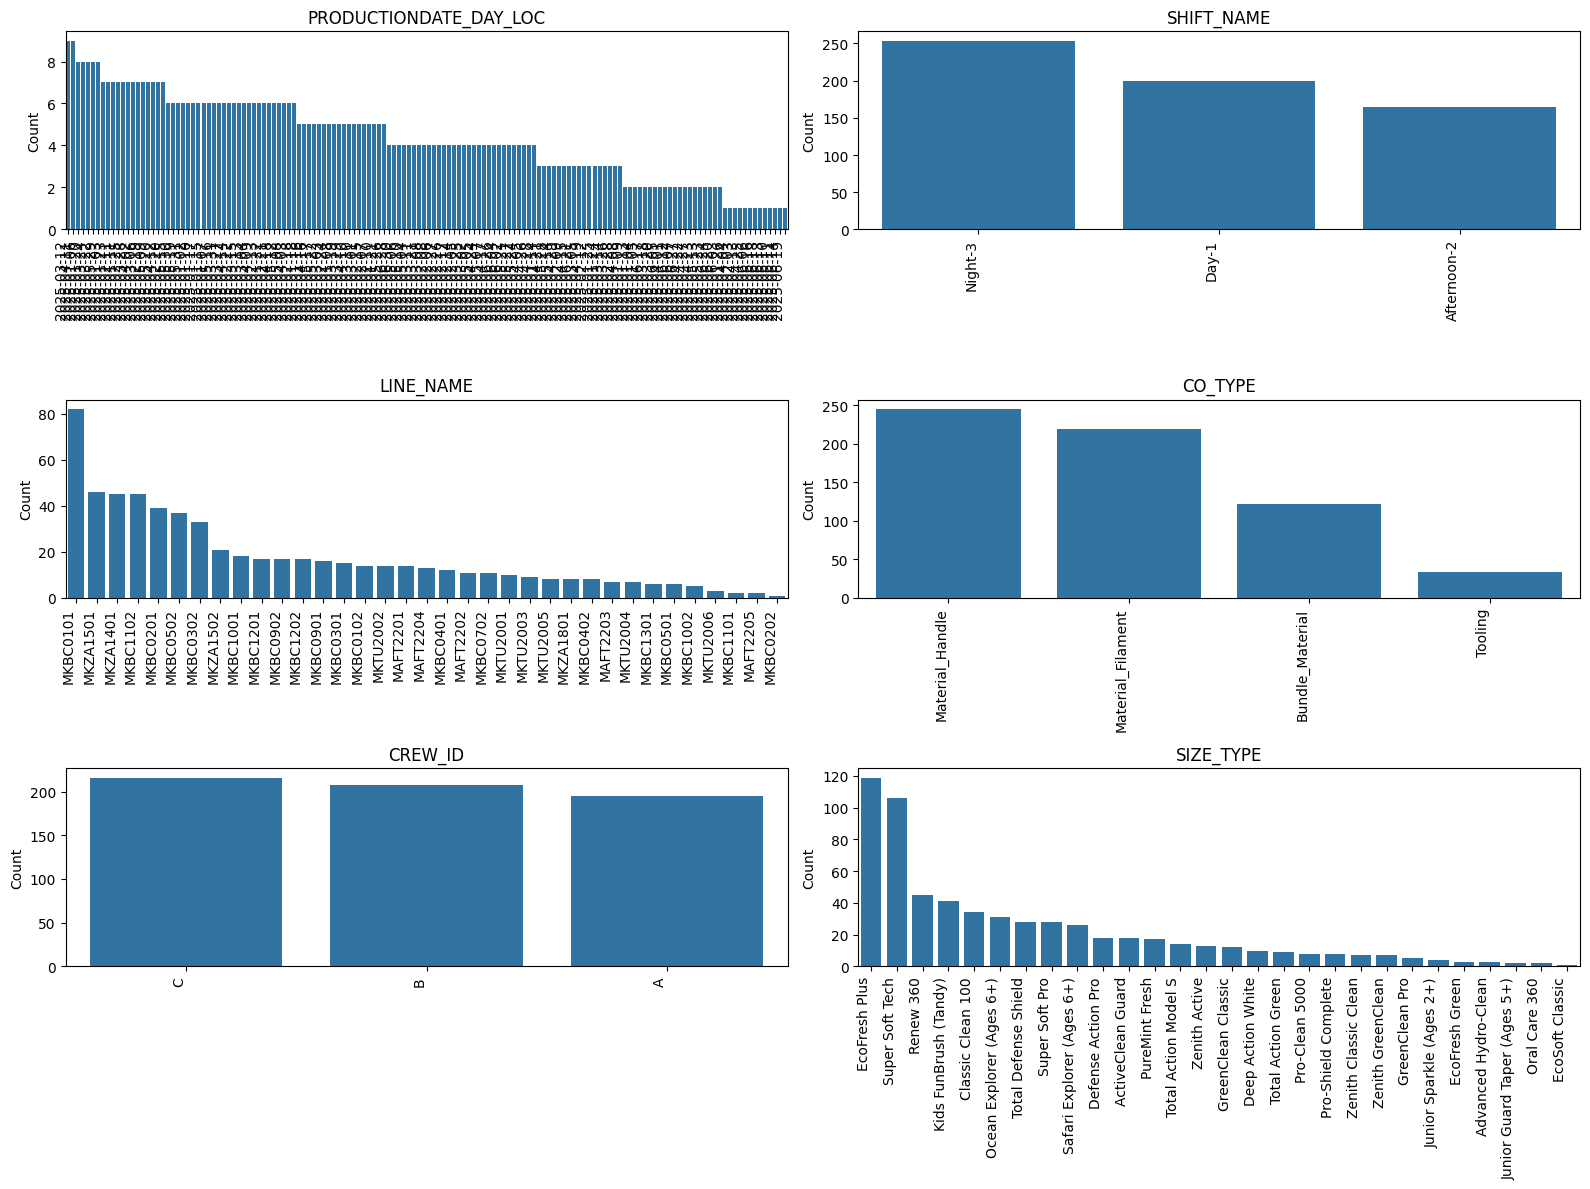

In [ ]:
cat_cols = no_prod.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=no_prod, x=col, order=no_prod[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Bất thường có thể nằm trong 2 cột: LINE_NAME và SIZE_TYPE, do một số nhóm xuất hiện thường xuyên hơn

## Kiểm định thống kê (INSIGHTS GAINED)

In [ ]:
no_prod['LINE_NAME'].value_counts().head()

,count
LINE_NAME,
MKBC0101,82
MKZA1501,46
MKZA1401,45
MKBC1102,45
MKBC0201,39


In [ ]:
no_prod['SIZE_TYPE'].value_counts().head()

,count
SIZE_TYPE,
EcoFresh Plus,119
Super Soft Tech,106
Renew 360,45
Kids FunBrush (Tandy),41
Classic Clean 100,34


In [ ]:
abnormal_sizes = ['EcoFresh Plus','Super Soft Tech']

no_prod_ratio = no_prod['SIZE_TYPE'].isin(abnormal_sizes).mean()
running_ratio = running_machines['SIZE_TYPE'].isin(abnormal_sizes).mean()

print(f"📊 Tỷ lệ SIZE_TYPE bất thường trong no_prod: {no_prod_ratio:.2%}")
print(f"📊 Tỷ lệ SIZE_TYPE bất thường trong running_machines: {running_ratio:.2%}")

📊 Tỷ lệ SIZE_TYPE bất thường trong no_prod: 36.35%
📊 Tỷ lệ SIZE_TYPE bất thường trong running_machines: 10.24%


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = [
    no_prod['SIZE_TYPE'].isin(abnormal_sizes).sum(),
    running_machines['SIZE_TYPE'].isin(abnormal_sizes).sum()
]
nobs = [len(no_prod), len(running_machines)]

stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic = {stat:.4f}")
print(f"p-value = {p_value:.4e}")

if p_value < 0.05:
    print("❗ Kết luận: Tỷ lệ SIZE_TYPE bất thường trong no_prod khác biệt có ý nghĩa thống kê so với running_machines.")
else:
    print("✅ Kết luận: Không có bằng chứng rõ ràng rằng SIZE_TYPE bất thường xuất hiện với tỷ lệ cao hơn trong no_prod.")


Z-statistic = 20.4331
p-value = 8.4917e-93
❗ Kết luận: Tỷ lệ SIZE_TYPE bất thường trong no_prod khác biệt có ý nghĩa thống kê so với running_machines.


Như vậy, một số SIZE_TYPE có xu hướng gặp lỗi theo dạng khi dây chuyền chạy, không tạo sản phẩm là ['EcoFresh Plus','Super Soft Tech']

In [ ]:
no_prod_ratio = no_prod['LINE_NAME'].isin(['MKBC0101']).mean()
running_ratio = running_machines['LINE_NAME'].isin(['MKBC0101']).mean()

print(f"📊 Tỷ lệ LINE_NAME bất thường trong no_prod: {no_prod_ratio:.2%}")
print(f"📊 Tỷ lệ LINE_NAME bất thường trong running_machines: {running_ratio:.2%}")

📊 Tỷ lệ LINE_NAME bất thường trong no_prod: 13.25%
📊 Tỷ lệ LINE_NAME bất thường trong running_machines: 2.84%


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = [
    no_prod['LINE_NAME'].isin(['MKBC0101']).sum(),
    running_machines['LINE_NAME'].isin(['MKBC0101']).sum()
]
nobs = [len(no_prod), len(running_machines)]

stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic = {stat:.4f}")
print(f"p-value = {p_value:.4e}")

if p_value < 0.05:
    print("❗ Kết luận: Tỷ lệ LINE_NAME bất thường trong no_prod khác biệt có ý nghĩa thống kê so với running_machines.")
else:
    print("✅ Kết luận: Không có bằng chứng rõ ràng rằng LINE_NAME bất thường xuất hiện với tỷ lệ cao hơn trong no_prod.")


Z-statistic = 14.6185
p-value = 2.1401e-48
❗ Kết luận: Tỷ lệ LINE_NAME bất thường trong no_prod khác biệt có ý nghĩa thống kê so với running_machines.


Như vậy, một số LINE_NAME có xu hướng gặp lỗi theo dạng khi dây chuyền chạy, không tạo sản phẩm là ['MKBC0101']


## Khám phá outliers trong no_prod

In [ ]:
no_prod.describe()

,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,619.000000,619.000000,619.0,619.0
mean,161.032310,75.724572,0.0,1.0
std,97.987577,34.757186,0.0,0.0
min,1.000000,20.000000,0.0,1.0
25%,77.500000,67.000000,0.0,1.0
50%,145.000000,78.950000,0.0,1.0
75%,237.000000,86.000000,0.0,1.0
max,413.000000,258.000000,0.0,1.0


,0
RUN_TIME,"Axes(0.125,0.653529;0.227941x0.226471)"
PRODUCTION_ORDER_RATE,"Axes(0.398529,0.653529;0.227941x0.226471)"
INEFFICIENT_FLAG,"Axes(0.672059,0.653529;0.227941x0.226471)"
NO_PRODUCT,"Axes(0.125,0.381765;0.227941x0.226471)"


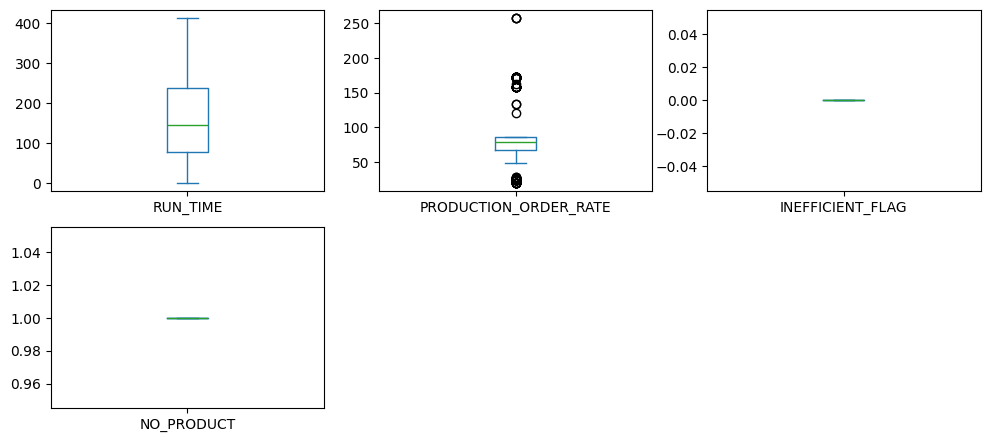

In [ ]:
no_prod.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8), sharex=False)


In [ ]:
cols = ['PRODUCTION_ORDER_RATE']

for col in cols:
    Q1 = no_prod[col].quantile(0.25)
    Q3 = no_prod[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = no_prod[(no_prod[col] < lower) | (no_prod[col] > upper)]
    print(f"\n📊 {col}")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(no_prod)*100:.2f}%)")



📊 PRODUCTION_ORDER_RATE
  Q1 = 67.00, Q3 = 86.00, IQR = 19.00
  Lower: 38.50, upper: 114.50
  Outliers: 146 (23.59%)


Số lượng outliers cao bất thường trong cột PRODUCTION_ORDER_RATE

In [ ]:
outliers

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,SIZE_TYPE,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
22,2025-01-02,Afternoon-2,MKBC0502,Material_Handle,A,Super Soft Tech,133,157.90,0,1
40,2025-01-02,Afternoon-2,MKTU2005,Tooling,A,EcoFresh Green,85,27.14,0,1
48,2025-01-02,Day-1,MAFT2202,Material_Filament,C,Renew 360,101,24.00,0,1
228,2025-01-03,Night-3,MAFT2202,Material_Handle,B,Renew 360,150,24.00,0,1
564,2025-01-06,Afternoon-2,MKTU2005,Material_Handle,A,Junior Guard Taper (Ages 5+),91,27.59,0,1
...,...,...,...,...,...,...,...,...,...,...
18154,2025-06-10,Afternoon-2,MKTU2003,Tooling,B,Zenith GreenClean,304,25.71,0,1
18797,2025-06-17,Afternoon-2,MKBC0302,Material_Filament,C,EcoFresh Plus,63,172.00,0,1
19287,2025-06-21,Afternoon-2,MKTU2006,Tooling,C,GreenClean Pro,162,24.29,0,1
20027,2025-06-28,Night-3,MKBC0101,Material_Handle,B,Safari Explorer (Ages 6+),264,258.00,0,1


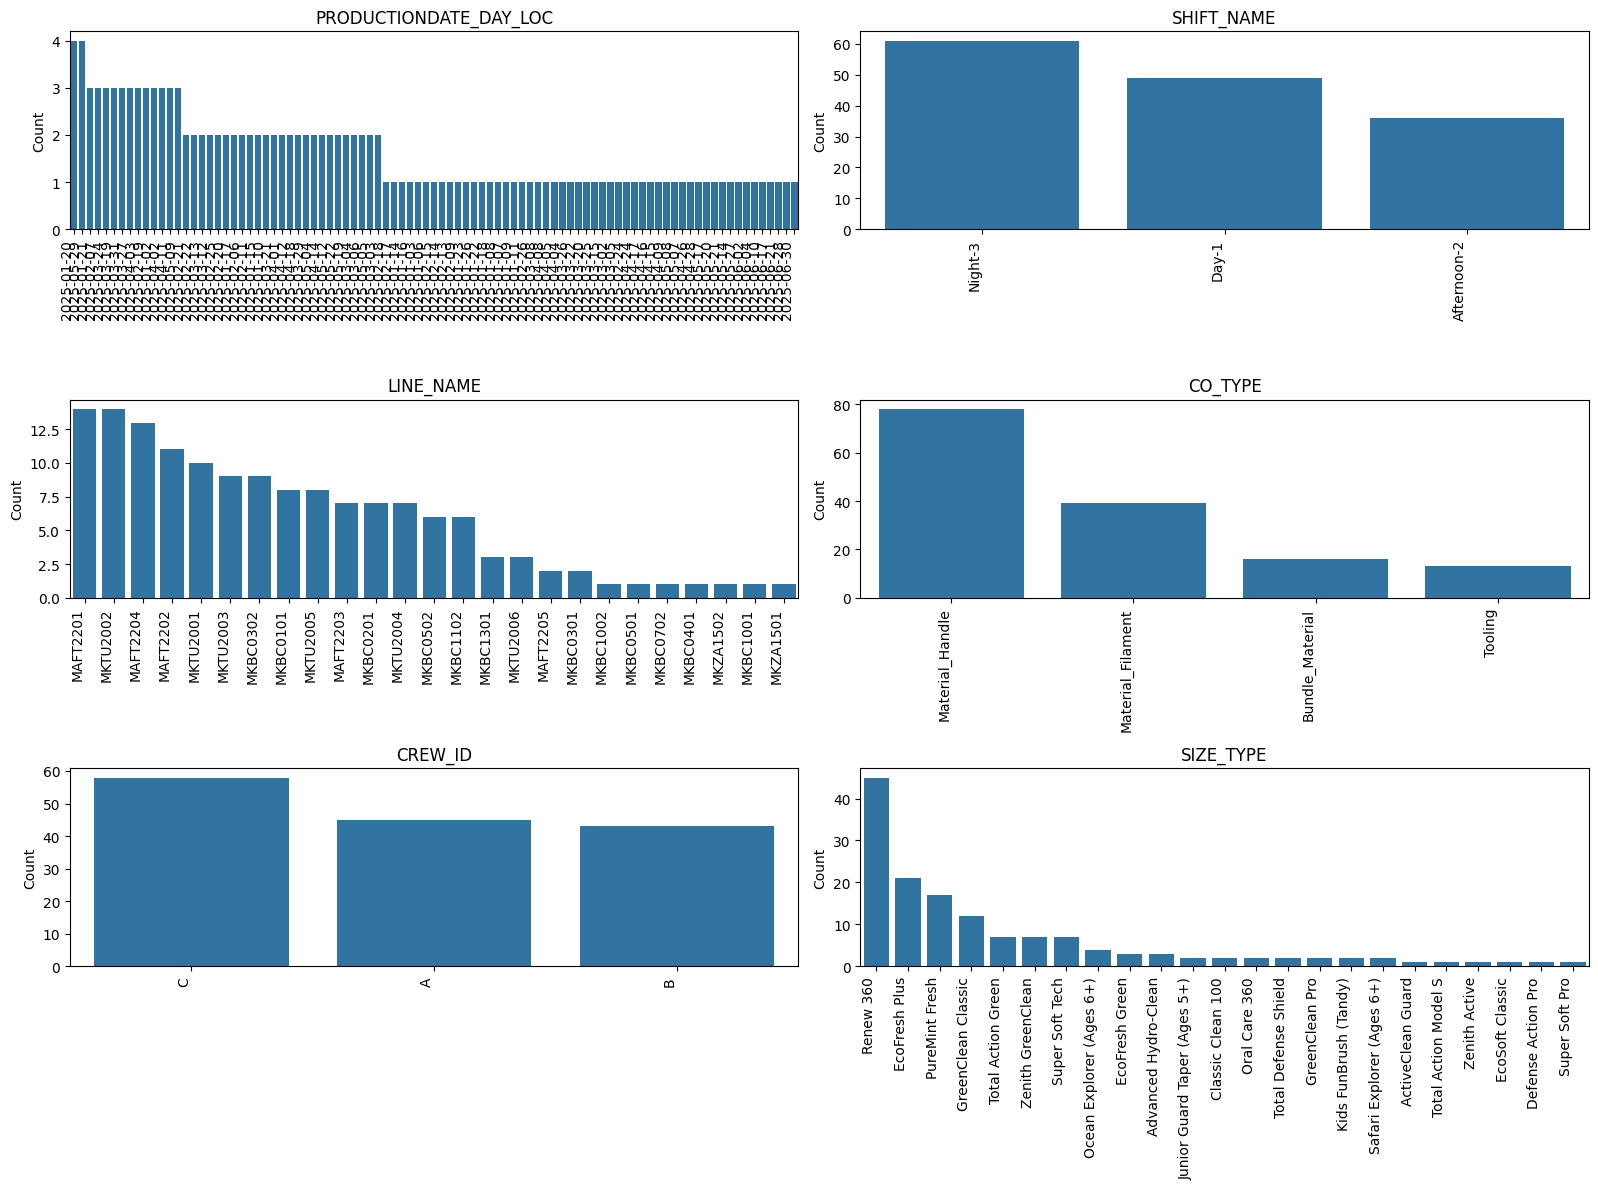

In [ ]:
cat_cols = outliers.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=outliers, x=col, order=outliers[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Có thể có vấn đề ở SIZE_TYPE = Renew 360

In [ ]:
outliers_renew = outliers[outliers['SIZE_TYPE'] == 'Renew 360']

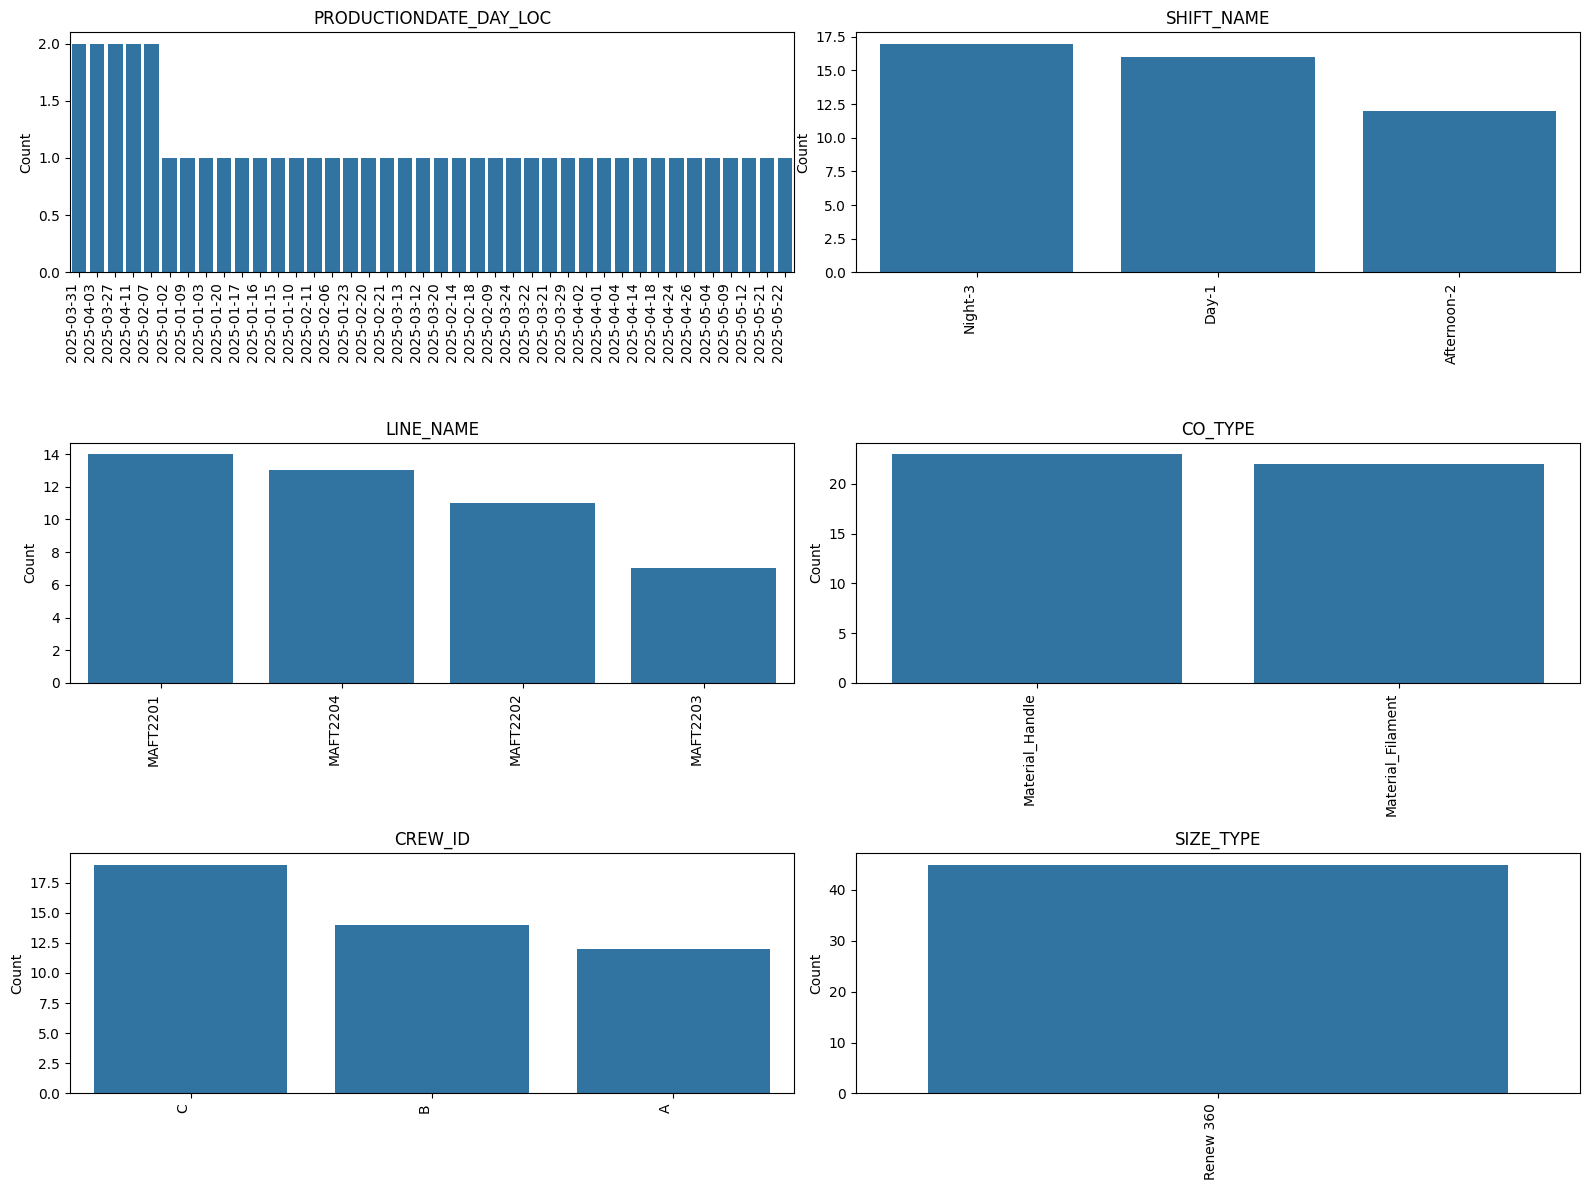

In [ ]:
cat_cols = outliers_renew.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=outliers_renew, x=col, order=outliers_renew[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
outliers_renew.describe()

,RUN_TIME,PRODUCTION_ORDER_RATE,INEFFICIENT_FLAG,NO_PRODUCT
count,45.000000,45.0,45.0,45.0
mean,135.666667,24.0,0.0,1.0
std,83.698593,0.0,0.0,0.0
min,12.000000,24.0,0.0,1.0
25%,53.000000,24.0,0.0,1.0
50%,131.000000,24.0,0.0,1.0
75%,197.000000,24.0,0.0,1.0
max,287.000000,24.0,0.0,1.0


Tiến hành kiểm tra PRODUCTION_ORDER_RATE trong tất cả các máy đang chạy, để xem liệu có biến động trong cột khi SIZE_TYPE = 'Renew 360' không

In [ ]:
running_machines[running_machines['SIZE_TYPE'] == 'Renew 360']['PRODUCTION_ORDER_RATE'].describe()

,PRODUCTION_ORDER_RATE
count,827.000000
mean,29.891173
std,10.535436
min,24.000000
25%,24.000000
50%,24.000000
75%,24.000000
max,72.000000


In [ ]:
running_machines[(running_machines['SIZE_TYPE'] == 'Renew 360') & (running_machines['PRODUCTION_ORDER_RATE'] == 24)].shape

(627, 14)

In [ ]:
running_machines[(running_machines['SIZE_TYPE'] == 'Renew 360')]['PRODUCTION_ORDER_RATE'].describe()

,PRODUCTION_ORDER_RATE
count,827.000000
mean,29.891173
std,10.535436
min,24.000000
25%,24.000000
50%,24.000000
75%,24.000000
max,72.000000


Phần lớn các SIZE_TYPE = 'Renew 360' đều có PRODUCTION_ORDER_RATE = 24, nên việc PRODUCTION_ORDER có nhiều giá trị ngoại lai với SIZE_TYPE = 'Renew 360' có thể do loại mặt hàng này có PRODUCTION_ORDER_RATE thấp, khó có thể nói là điểm bất thường.